In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import missingno as msno
from textwrap import wrap

import warnings
warnings.filterwarnings('ignore')

## Loading datasets

In [ ]:
# Loading dataset

transaction_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', 'Transactions')
customer_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', 'CustomerDemographic')
customer_address_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', 'CustomerAddress')

In [ ]:
# View data to adjust formatting
transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [ ]:
transaction_df.columns = transaction_df.iloc[0]
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [ ]:
transaction_df.drop(index = transaction_df.index[0], axis = 0, inplace = True)
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [ ]:
customer_address_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [ ]:
customer_address_df.columns = customer_address_df.iloc[0]
customer_address_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [ ]:
customer_address_df.drop(index=customer_address_df.index[0], axis=0, inplace=True)
customer_address_df.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
customer_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaN,120.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaN,120.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaN,120.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaN,120.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


# Data Cleaning - Dealing with missing values

## Transaction sheet:

In [ ]:
transaction_df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


In [ ]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [ ]:
# Inspect missing values in the dataset
print(transaction_df.isnull().sum())

# Replace the ' 's with Nan
transaction_df = transaction_df.replace(' ', np.nan)

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


<Axes: >

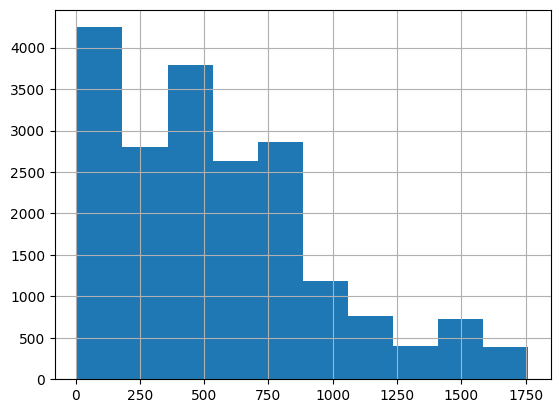

In [ ]:
transaction_df['standard_cost'].hist()

<Axes: xlabel='0', ylabel='0'>

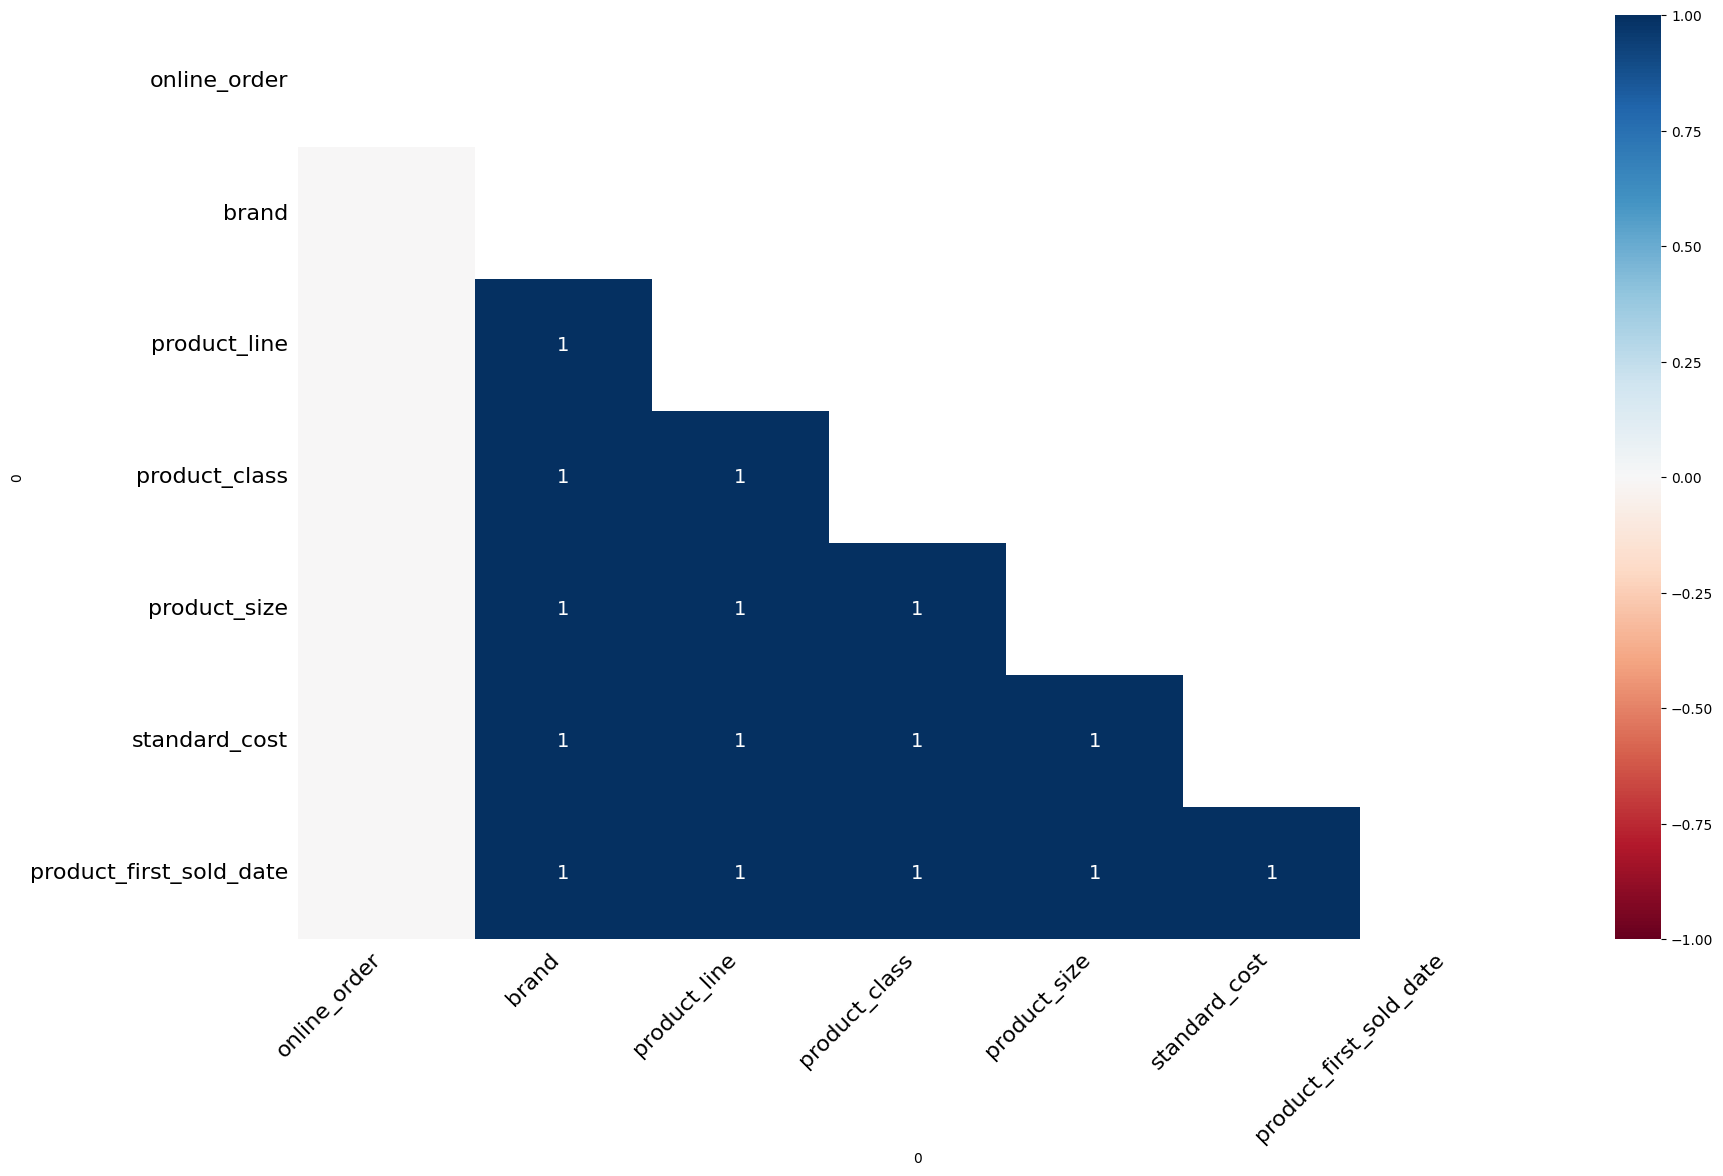

In [ ]:
msno.heatmap(transaction_df)

I have one concern: what if the analysis results are affected by the missing values that were replaced by the mean?

Numerical Variables

<Axes: >

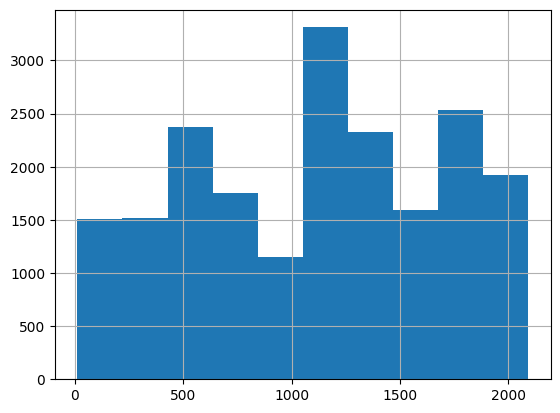

In [ ]:
transaction_df['list_price'].hist()

In [ ]:
print(transaction_df['list_price'].mean())
print(transaction_df['list_price'].median())
print(transaction_df['list_price'].mode()[0])

1107.8294490000271
1163.89
2091.47


<Axes: >

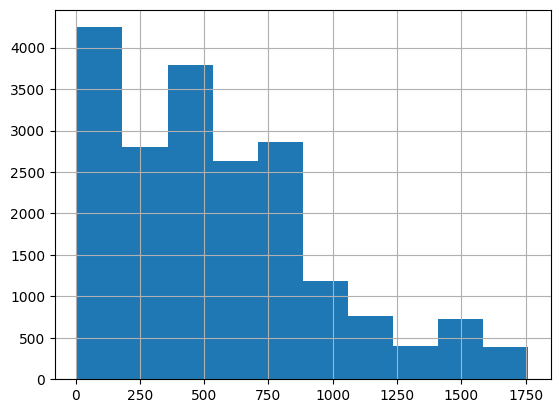

In [ ]:
transaction_df['standard_cost'].hist()

In [ ]:
print(transaction_df['standard_cost'].mean())
print(transaction_df['standard_cost'].median())
print(transaction_df['standard_cost'].mode()[0])

556.0469512209421
507.58
388.92


Therefore, we decided to use the mean to fill in the missing values in the numerical columns

In [ ]:
numerical_cols = ['list_price', 'standard_cost', 'product_first_sold_date']
for col in numerical_cols:
    transaction_df[col].fillna(transaction_df[col].mean(), inplace=True)

Categorical Variables

In [ ]:
categorical_cols = ['online_order', 'brand', 'product_line', 'product_class', 'product_size']
for col in categorical_cols:
    transaction_df[col].fillna(transaction_df[col].mode()[0], inplace=True)

In [ ]:
# Check the number of NaNs to verify
print(transaction_df.isnull().values.sum())

0


## Customer Demographic Sheet

In [ ]:
customer_df.describe()

,customer_id,past_3_years_bike_related_purchases,age,tenure
count,4000.000000,4000.000000,3999.000000,3913.000000
mean,2000.500000,48.890000,44.054514,10.657041
std,1154.844867,28.715005,16.858429,5.660146
min,1.000000,0.000000,18.000000,1.000000
25%,1000.750000,24.000000,33.000000,6.000000
50%,2000.500000,48.000000,43.000000,11.000000
75%,3000.250000,73.000000,53.000000,15.000000
max,4000.000000,99.000000,120.000000,22.000000


In [ ]:
customer_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaN,120.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaN,120.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaN,120.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaN,120.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   age                                  3999 non-null   float64
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [ ]:
customer_df = customer_df.replace(' ', np.nan)
customer_df.drop(columns=['DOB'], axis=1, inplace=True)

<Axes: >

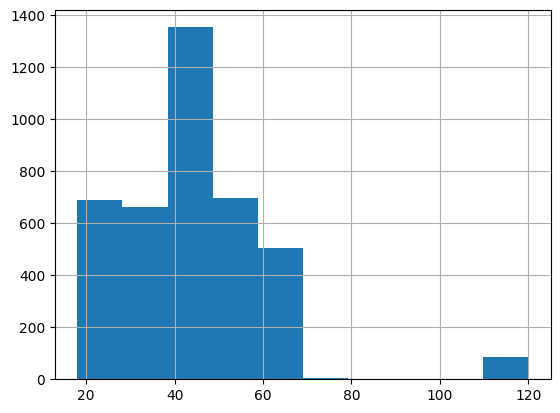

In [ ]:
customer_df['age'].hist()

In [ ]:
customer_df['age'].replace(120, np.nan, inplace=True)

<Axes: >

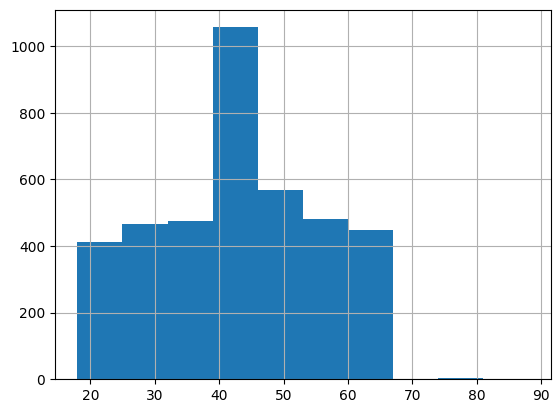

In [ ]:
customer_df['age'].hist()

In [ ]:
print(customer_df['age'].mean())
print(customer_df['age'].mode()[0])

42.36554192229039
42.0



So we decided to fill the missing values in the age column with the mode since it is an integer.



<Axes: >

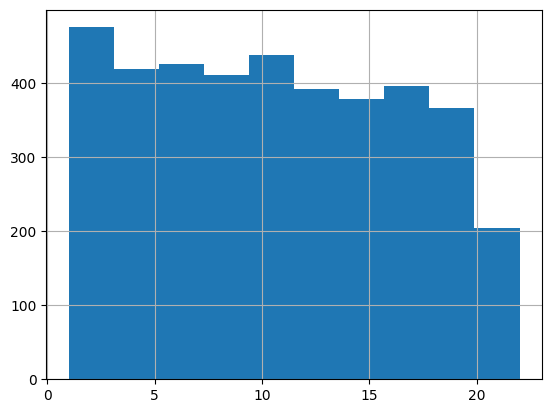

In [ ]:
customer_df['tenure'].hist()

In [ ]:
print(customer_df['tenure'].mean())
print(customer_df['tenure'].mode()[0])

10.65704063378482
7.0


In [ ]:
customer_df['age'].fillna(customer_df['age'].mode()[0], inplace=True)
customer_df['tenure'].fillna(customer_df['tenure'].mean(), inplace=True)

In [ ]:
customer_df['job_title'].fillna('unknown', inplace=True)
customer_df['job_industry_category'].fillna('unknown', inplace=True)

In [ ]:
customer_df.isnull().values.sum()

0

## Customer Address Sheet

In [ ]:
customer_address_df.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
customer_address_df['state'].value_counts()

,count
state,
NSW,2054
VIC,939
QLD,838
New South Wales,86
Victoria,82


In [ ]:
# Replace the duplicate values
customer_address_df['state'].replace('New South Wales', 'NSW', inplace=True)
customer_address_df['state'].replace('Victoria', 'VIC', inplace=True)

In [ ]:
customer_address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


# EDA

## Merge three sheets for further analysis

In [ ]:
print(transaction_df['customer_id'].nunique())
print(customer_df['customer_id'].nunique())
print(customer_address_df['customer_id'].nunique())

3494
4000
3999


In [ ]:
customer_df = customer_df.merge(customer_address_df, on='customer_id', how='left')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   object 
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   age                                  4000 non-null   float64
 5   job_title                            4000 non-null   object 
 6   job_industry_category                4000 non-null   object 
 7   wealth_segment                       4000 non-null   object 
 8   deceased_indicator                   4000 non-null   object 
 9   owns_car                             4000 non-null   object 
 10  tenure                               4000 non-null   float64
 11  address                       

<Axes: >

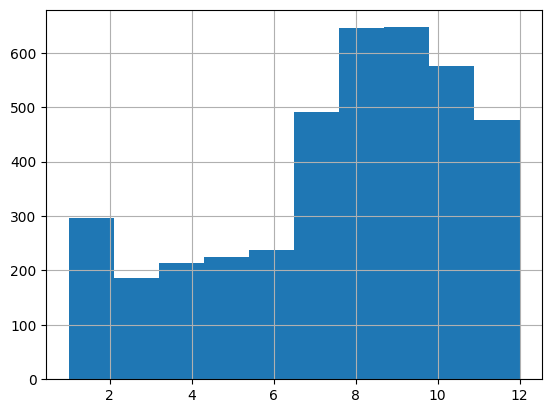

In [ ]:
customer_df['property_valuation'].hist()

In [ ]:
print(customer_df['property_valuation'].mean())
print(customer_df['property_valuation'].mode()[0])

7.514014014014014
9


In [ ]:
customer_df['property_valuation'] = customer_df.groupby('wealth_segment')['property_valuation'].transform(lambda x: x.fillna(x.mode().iloc[0]))

<Axes: >

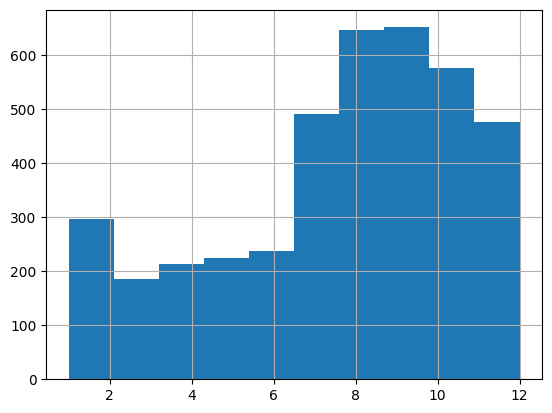

In [ ]:
customer_df['property_valuation'].hist()

In [ ]:
customer_df.fillna('unknown', inplace=True)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   object 
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   age                                  4000 non-null   float64
 5   job_title                            4000 non-null   object 
 6   job_industry_category                4000 non-null   object 
 7   wealth_segment                       4000 non-null   object 
 8   deceased_indicator                   4000 non-null   object 
 9   owns_car                             4000 non-null   object 
 10  tenure                               4000 non-null   float64
 11  address                       

In [ ]:
df = transaction_df.merge(customer_df, on='customer_id', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       20000 non-null  object 
 1   product_id                           20000 non-null  object 
 2   customer_id                          20000 non-null  object 
 3   transaction_date                     20000 non-null  object 
 4   online_order                         20000 non-null  bool   
 5   order_status                         20000 non-null  object 
 6   brand                                20000 non-null  object 
 7   product_line                         20000 non-null  object 
 8   product_class                        20000 non-null  object 
 9   product_size                         20000 non-null  object 
 10  list_price                           20000 non-null  object 
 11  standard_cost               

In [ ]:
df['customer_id'][df['name'].isnull()]

,customer_id
8707,5034
16700,5034
17468,5034


In [ ]:
print(df[df['customer_id'] == 5034].to_string())

      transaction_id product_id customer_id     transaction_date  online_order order_status           brand product_line product_class product_size list_price  standard_cost  product_first_sold_date name gender  past_3_years_bike_related_purchases  age job_title job_industry_category wealth_segment deceased_indicator owns_car  tenure address postcode state country  property_valuation
8707            8708          0        5034  2017-10-07 00:00:00         False     Approved           Solex         Road        medium       medium     416.98     312.735016                  42218.0  NaN    NaN                                  NaN  NaN       NaN                   NaN            NaN                NaN      NaN     NaN     NaN      NaN   NaN     NaN                 NaN
16700          16701          0        5034  2017-01-27 00:00:00         False     Approved  Norco Bicycles     Standard        medium       medium      360.4     270.299988                  35667.0  NaN    NaN                

I decide to delete this customer's information.

**Is that correct?**

In [ ]:
df.drop(df[df['customer_id'] == 5034].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19997 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19997 non-null  object 
 1   product_id                           19997 non-null  object 
 2   customer_id                          19997 non-null  object 
 3   transaction_date                     19997 non-null  object 
 4   online_order                         19997 non-null  bool   
 5   order_status                         19997 non-null  object 
 6   brand                                19997 non-null  object 
 7   product_line                         19997 non-null  object 
 8   product_class                        19997 non-null  object 
 9   product_size                         19997 non-null  object 
 10  list_price                           19997 non-null  object 
 11  standard_cost                    

## EDA

1. 每个月份的产品是否有preference？--引入cohort month后好操作
2. 不同的客户在不同的产品上是否有preference？ -- 这里的不同包括：1) 性别 2) 财富 3) 地区 4） other feature
3. 给客户分组做segmentation：RFM analysis

In [ ]:
df['list_price'] = pd.to_numeric(df['list_price'])
print(df.head().to_string())

  transaction_id product_id customer_id     transaction_date  online_order order_status           brand product_line product_class product_size  list_price  standard_cost  product_first_sold_date              name  gender  past_3_years_bike_related_purchases   age                   job_title job_industry_category     wealth_segment deceased_indicator owns_car  tenure              address postcode state    country  property_valuation
0              1          2        2950  2017-02-25 00:00:00         False     Approved           Solex     Standard        medium       medium       71.49          53.62                  41245.0   Kristos Anthony    Male                                 19.0  65.0         Software Engineer I    Financial Services      Mass Customer                  N      Yes    10.0    984 Hoepker Court     3064   VIC  Australia                 6.0
1              2          3        3120  2017-05-21 00:00:00          True     Approved   Trek Bicycles     Standard        me

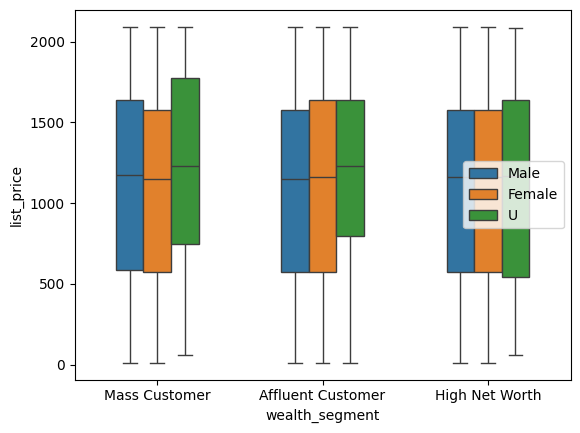

In [ ]:
sns.boxplot(x='wealth_segment', y='list_price', hue='gender', data=df, order=None,
            hue_order=None,
            color=None,
            saturation=.75, width=.5, notch=False, ax=None)
plt.legend(loc='best')

I do not think this graph demonstrates any interesting insights

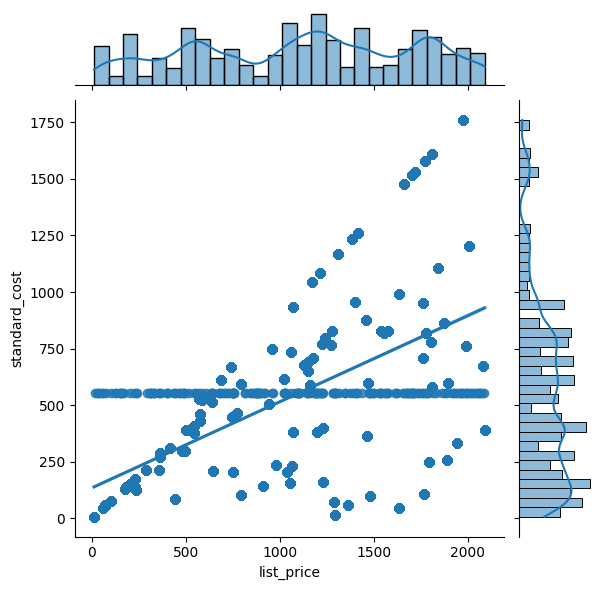

In [ ]:
sns.jointplot(x='list_price', y='standard_cost',
                      data=df,  kind="reg",
                      color=None, ratio=5,
                      dropna=True, xlim=None,
                      ylim=None)

There might be a linear relationship between these two features, and the reason is obvious. However, the mode of the standard cost can be confusing.

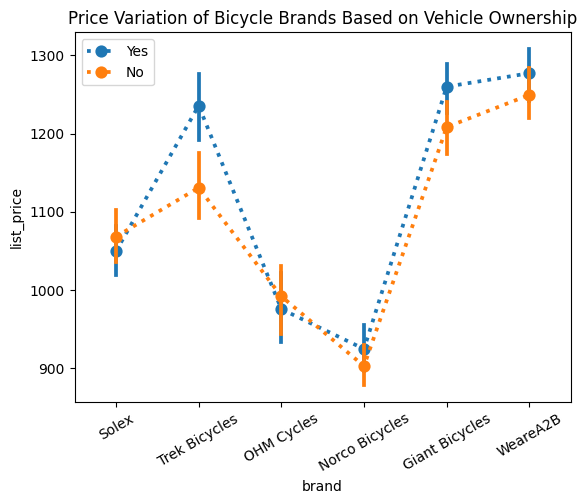

In [ ]:
sns.pointplot(x='brand', y='list_price', hue='owns_car', data=df,  estimator=np.mean, ci=99,
                 n_boot=1000,  markers="o",
                 linestyles=":")
plt.xticks(rotation=30)
plt.title('Price Variation of Bicycle Brands Based on Vehicle Ownership')
plt.legend(loc='best')

Car owners spend significantly more on Trek Bicycles and Giant Bicycles, and slightly more on WeareA2B compared to other brands.

Considering a delivery service might increase sales.

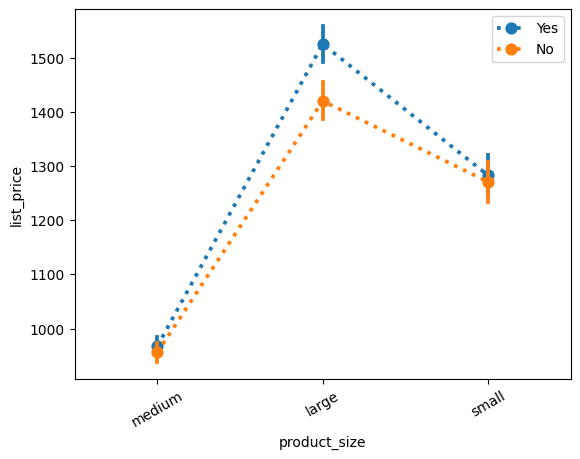

In [ ]:
sns.pointplot(x='product_size', y='list_price', hue='owns_car', data=df,  estimator=np.mean, ci=99,
                 n_boot=1000,  markers="o",
                 linestyles=":")
plt.xticks(rotation=30)
plt.legend(loc='best')

<Axes: >

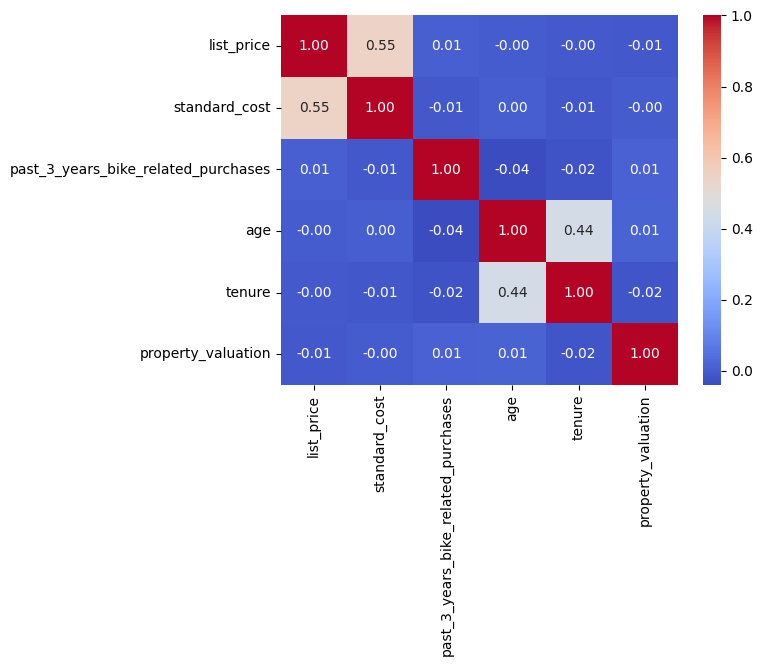

In [ ]:
## Numerical Variables
sns.heatmap(df[["list_price","standard_cost","past_3_years_bike_related_purchases","age","tenure","property_valuation"]].corr(),
            annot=True, fmt=".2f", cmap = "coolwarm")

Just as we mentioned before, list price and standard cost have a linear relationship, as do tenure and age. Therefore, I don't think these numerical features provide further insights.

I don't think this heatmap provides any meaningful insights because tenure is obviously correlated with age, as both are measured in years.



<Axes: >

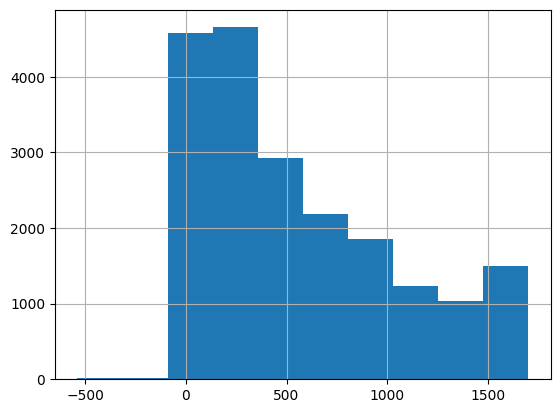

In [ ]:
df['profit'] = df['list_price'] - df['standard_cost']
df['profit'].hist()

In [ ]:
df.loc[df['profit'] < 0, ['transaction_id', 'product_id', 'brand', 'product_line', 'product_class', 'product_size', 'list_price', 'standard_cost','profit']].head()


,transaction_id,product_id,brand,product_line,product_class,product_size,list_price,standard_cost,profit
780,781,0,Solex,Standard,medium,medium,311.54,556.046951,-244.506951
1003,1004,0,Solex,Standard,medium,medium,205.84,556.046951,-350.206951
1680,1681,0,Solex,Standard,medium,medium,294.35,556.046951,-261.696951
1752,1753,0,Solex,Standard,medium,medium,149.30,556.046951,-406.746951
1778,1779,0,Solex,Standard,medium,medium,447.25,556.046951,-108.796951


The profit is negative because the Solex brand's standard_cost was missing and replaced by the feature's mean.

So, for further analysis based on profit, we should ignore these variables.

In [ ]:
df_profit = df.drop(df[df['profit'] < 0].index)

In [ ]:
grouped_profit = df_profit.groupby(['brand', 'product_line','product_class']).agg({'profit': 'mean'}).reset_index().sort_values(by='profit', ascending=False)
grouped_profit.head()

,brand,product_line,product_class,profit
21,Solex,Touring,medium,1408.910000
31,WeareA2B,Touring,medium,1366.387282
4,Giant Bicycles,Touring,medium,1010.020000
26,Trek Bicycles,Standard,low,903.110000
14,OHM Cycles,Standard,low,888.157526


In [ ]:
grouped_sum_profit = df_profit.groupby(['brand', 'product_line','product_class']).agg({'profit': 'sum'}).reset_index().sort_values(by='profit', ascending=False)
df['profit'] = df['profit'].apply(lambda x: '%.2f' % x)

grouped_sum_profit.head()

,brand,product_line,product_class,profit
30,WeareA2B,Standard,medium,1.866861e+06
20,Solex,Standard,medium,1.414680e+06
27,Trek Bicycles,Standard,medium,1.061535e+06
3,Giant Bicycles,Standard,medium,8.915852e+05
31,WeareA2B,Touring,medium,8.444273e+05


array([[<Axes: title={'center': 'profit'}>]], dtype=object)

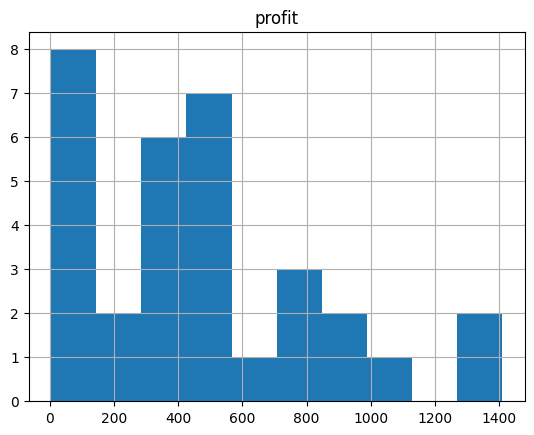

In [ ]:
grouped_profit.hist()

array([[<Axes: title={'center': 'profit'}>]], dtype=object)

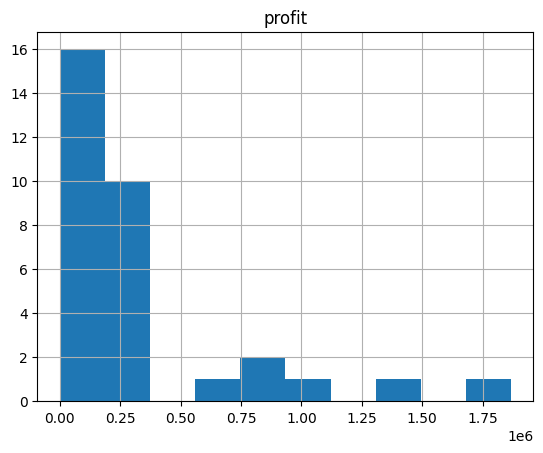

In [ ]:
grouped_sum_profit.hist()

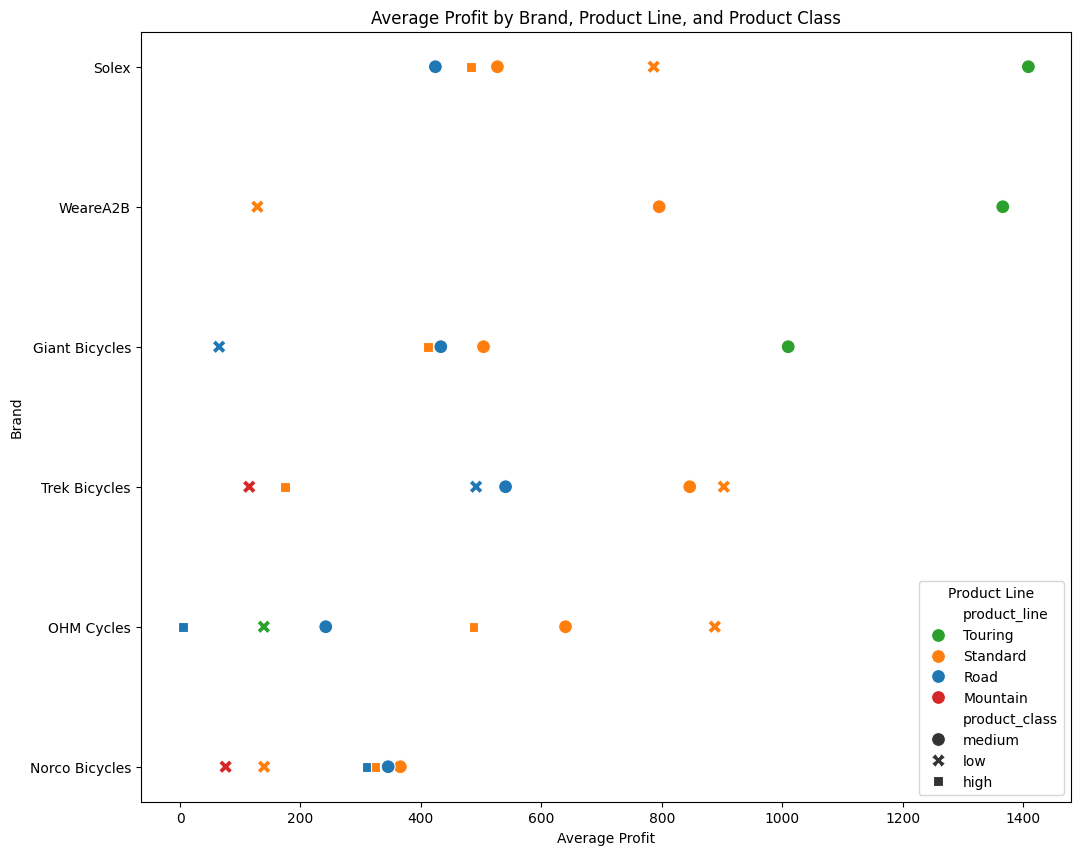

In [ ]:
palette = {
    'Road': '#1f77b4',
    'Standard': '#ff7f0e',
    'Touring': '#2ca02c',
    'Mountain': '#d62728'
}

plt.figure(figsize=(12,10))
sns.scatterplot(x='profit', y='brand', hue='product_line', style='product_class', s=100, data=grouped_profit, palette=palette)
plt.title('Average Profit by Brand, Product Line, and Product Class')
plt.xlabel('Average Profit')
plt.ylabel('Brand')
plt.legend(title='Product Line', loc='best')
plt.show()

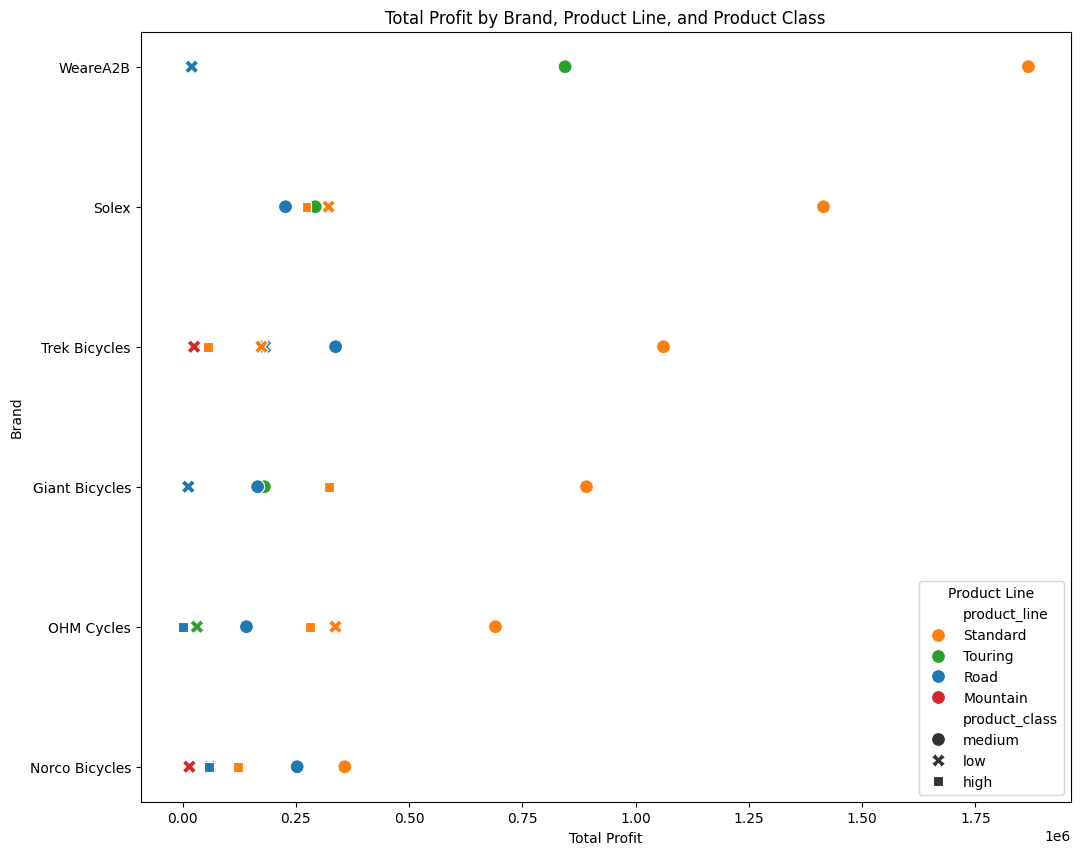

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='profit', y='brand', hue='product_line', style='product_class', s=100, data=grouped_sum_profit, palette=palette)
plt.title('Total Profit by Brand, Product Line, and Product Class')
plt.xlabel('Total Profit')
plt.ylabel('Brand')
plt.legend(title='Product Line', loc='best')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19997 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19997 non-null  object 
 1   product_id                           19997 non-null  object 
 2   customer_id                          19997 non-null  object 
 3   transaction_date                     19997 non-null  object 
 4   online_order                         19997 non-null  bool   
 5   order_status                         19997 non-null  object 
 6   brand                                19997 non-null  object 
 7   product_line                         19997 non-null  object 
 8   product_class                        19997 non-null  object 
 9   product_size                         19997 non-null  object 
 10  list_price                           19997 non-null  float64
 11  standard_cost                    

### Customer Dimonsion - RMF analysis

In [ ]:
df['transaction_date'] = pd.to_datetime(df['transaction_date']).dt.date

current_date = df['transaction_date'].max() + pd.Timedelta(days=1)
# Therefore, the transaction of the last day will be marked as 1
current_date

datetime.date(2017, 12, 31)

In [ ]:
rfm = df.groupby('customer_id').agg({
    'transaction_date' : lambda x:(current_date - x.max()).days,
    'transaction_id' : 'count',
    'list_price' : 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']
rfm.head()

,customer_id,recency,frequency,monetary
0,1,8,11,9084.45
1,2,129,3,4149.07
2,3,103,8,9888.23
3,4,196,2,1047.72
4,5,17,6,5903.20


In [ ]:
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['frequency_score'] = pd.qcut(rfm['frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['rfm_score']  = rfm['recency_score'].astype(int) + rfm['frequency_score'].astype(int) + rfm['monetary_score'].astype(int)

rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,1,8,11,9084.45,5,5,5,15
1,2,129,3,4149.07,1,1,2,4
2,3,103,8,9888.23,1,4,5,10
3,4,196,2,1047.72,1,1,1,3
4,5,17,6,5903.20,4,3,3,10


In [ ]:
rfm['customer_level'] = pd.qcut(rfm['rfm_score'], 5, labels=['Tier5', 'Tier4', 'Tier3', 'Tier2', 'Tier1'])
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,customer_level
0,1,8,11,9084.45,5,5,5,15,Tier1
1,2,129,3,4149.07,1,1,2,4,Tier5
2,3,103,8,9888.23,1,4,5,10,Tier3
3,4,196,2,1047.72,1,1,1,3,Tier5
4,5,17,6,5903.20,4,3,3,10,Tier3


In [ ]:
rfm['rfm_score'].value_counts()

,count
rfm_score,
7,345
8,324
11,319
12,307
10,306
9,297
6,283
5,272
3,253


In [ ]:
rfm['customer_level'].value_counts()

,count
customer_level,
Tier4,952
Tier5,757
Tier2,626
Tier3,603
Tier1,555


Text(0.5, 1.0, 'Customer Level Distribution')

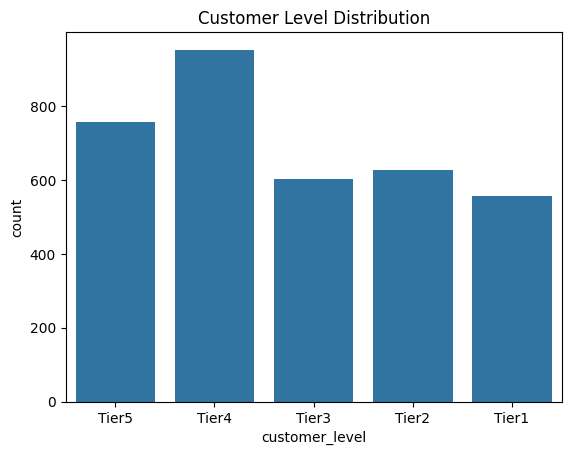

In [ ]:
sns.countplot(x='customer_level', data=rfm)
plt.title('Customer Level Distribution')

In [ ]:
rfm_avg_spending = rfm.groupby('customer_level').agg({'monetary': 'mean', 'rfm_score': 'mean'}).reset_index().round(2)
rfm_avg_spending.head()

,customer_level,monetary,rfm_score
0,Tier5,3242.60,4.03
1,Tier4,4954.06,7.04
2,Tier3,6636.24,9.51
3,Tier2,8221.63,11.49
4,Tier1,10514.90,13.81


<Axes: >

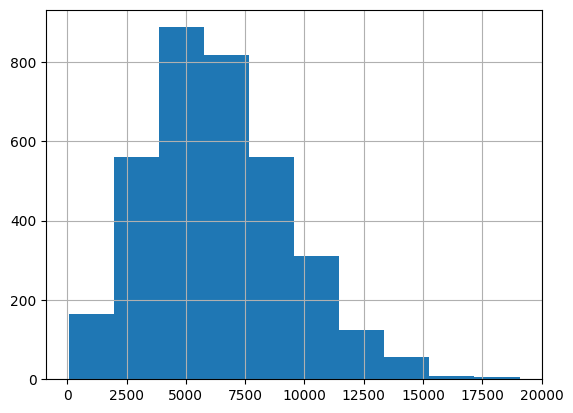

In [ ]:
rfm['monetary'].hist()

In [ ]:
rfm = rfm.astype({'recency_score': float, 'frequency_score': float, 'monetary_score': float})

In [ ]:
rfm.groupby('customer_level')[['recency', 'frequency', 'monetary', 'rfm_score']].agg(['min', 'max', 'mean'])

recency                  frequency               monetary  \
                   min  max        mean       min max      mean      min   
customer_level                                                             
Tier5               34  354  127.207398         1   6  3.149273    60.34   
Tier4                1  294   60.129202         1   8  4.634454   458.74   
Tier3                1  222   47.950249         4  10  6.051410  2828.68   
Tier2                1  141   37.777955         5  13  7.297125  3915.94   
Tier1                1   59   17.639640         6  14  8.980180  5904.32   

                                       rfm_score                 
                     max          mean       min max       mean  
customer_level                                                   
Tier5            6745.71   3242.596380         3   5   4.025099  
Tier4           10115.02   4954.056166         6   8   7.043067  
Tier3           13490.52   6636.241824         9  10   9.507463  
Tier2           15091.91   8221.625719        11  12  11.490415  
Tier1           19071.32  10514.902000        13  15  13.814414

In [ ]:
# Merge with customer data
df = df.merge(rfm, on='customer_id', how='left')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,property_valuation,profit,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,customer_level
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,6.0,17.87,76,3,1953.15,2.0,1.0,1.0,4,Tier5
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,5.0,1702.55,21,7,7351.70,4.0,4.0,4.0,12,Tier2
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,1.0,1544.61,57,6,8148.22,3.0,3.0,4.0,10,Tier3
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,10.0,817.36,122,7,7539.81,1.0,4.0,4.0,9,Tier3
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,7.0,1055.82,76,10,11292.54,2.0,5.0,5.0,12,Tier2


In [ ]:
tier5_customer = df[df['customer_level'] == 'Tier5']
tier4_customer = df[df['customer_level'] == 'Tier4']
tier3_customer = df[df['customer_level'] == 'Tier3']
tier2_customer = df[df['customer_level'] == 'Tier2']
tier1_customer = df[df['customer_level'] == 'Tier1']

In [ ]:
print(tier5_customer.head().to_string())

   transaction_id product_id customer_id transaction_date  online_order order_status          brand product_line product_class product_size  list_price  standard_cost  product_first_sold_date             name  gender  past_3_years_bike_related_purchases   age               job_title job_industry_category  wealth_segment deceased_indicator owns_car  tenure             address postcode state    country  property_valuation   profit  recency  frequency  monetary  recency_score  frequency_score  monetary_score  rfm_score customer_level
0               1          2        2950       2017-02-25         False     Approved          Solex     Standard        medium       medium       71.49          53.62                  41245.0  Kristos Anthony    Male                                 19.0  65.0     Software Engineer I    Financial Services   Mass Customer                  N      Yes    10.0   984 Hoepker Court     3064   VIC  Australia                 6.0    17.87       76          3   1953.15 

1. 不同Tier之间Brand/Product的偏好
- count出来每个brand/product在该Tier的值
2. Tier之间的Demographic（年龄/地区/财富/车）

In [ ]:
df.groupby('customer_level').agg({'recency_score':'mean', 'frequency_score': 'mean', 'monetary_score':'mean'}).round(2)

,recency_score,frequency_score,monetary_score
customer_level,,,
Tier5,1.55,1.13,1.47
Tier4,2.69,2.03,2.40
Tier3,3.07,3.10,3.36
Tier2,3.39,3.94,4.18
Tier1,4.40,4.66,4.82


In [ ]:
brand_counts = df.pivot_table(index='customer_level', columns='brand', aggfunc='size', fill_value=0)
brand_counts.head()

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
customer_level,,,,,,
Tier5,379,341,353,543,374,394
Tier4,726,633,714,993,626,720
Tier3,601,553,524,801,526,644
Tier2,775,666,678,1059,654,736
Tier1,831,716,773,1053,810,801


In [ ]:
brand_counts = df.pivot_table(index='customer_level', columns='brand', aggfunc='size', fill_value=0)
total_brand_counts = brand_counts.sum(axis=1)
brand_percentage = brand_counts.div(total_brand_counts, axis=0) * 100
brand_percentage = brand_percentage.round(2)
brand_percentage

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
customer_level,,,,,,
Tier5,15.90,14.30,14.81,22.78,15.69,16.53
Tier4,16.46,14.35,16.18,22.51,14.19,16.32
Tier3,16.47,15.15,14.36,21.95,14.41,17.65
Tier2,16.97,14.58,14.84,23.18,14.32,16.11
Tier1,16.67,14.37,15.51,21.13,16.25,16.07


Text(0.5, 1.0, 'Distribution of Brand among different Tiers')

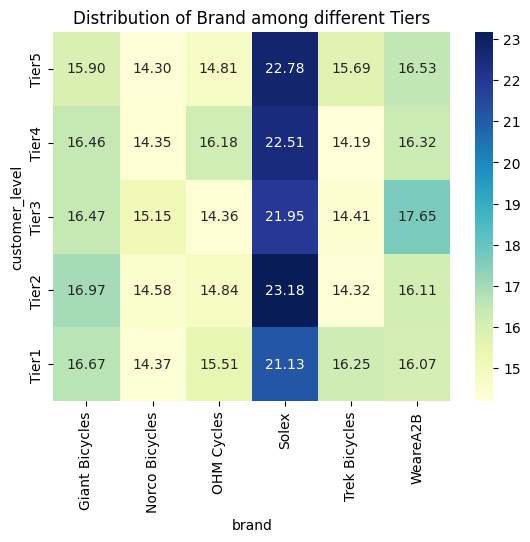

In [ ]:
sns.heatmap(brand_percentage, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Distribution of Brand among different Tiers')

Giant Bicycles is popular among higher groups;

Solex and Trek Bicycles are popular for Tier5.

In [ ]:
product_line_counts = df.pivot_table(index='customer_level', columns='product_line', aggfunc='size', fill_value=0)
total_product_line_counts = product_line_counts.sum(axis=1)
product_line_percentage = product_line_counts.div(total_product_line_counts, axis=0) * 100
product_line_percentage = product_line_percentage.round(2)
product_line_percentage

product_line,Mountain,Road,Standard,Touring
customer_level,,,,
Tier5,2.64,19.84,72.19,5.33
Tier4,2.11,20.40,71.51,5.98
Tier3,2.11,18.96,72.81,6.11
Tier2,2.01,20.03,71.48,6.48
Tier1,1.97,19.82,71.71,6.50


Text(0.5, 1.0, 'Distribution of Product Line among different Tiers')

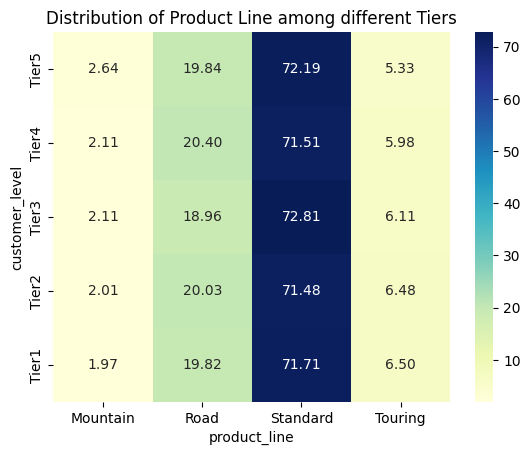

In [ ]:
sns.heatmap(product_line_percentage, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Distribution of Product Line among different Tiers')

Low Tier customer prefer Mountain.


In [ ]:
product_class_counts = df.pivot_table(index='customer_level', columns='product_class', aggfunc='size', fill_value=0)
total_product_class_counts = product_class_counts.sum(axis=1)
product_class_percentage = product_class_counts.div(total_product_class_counts, axis=0) * 100
product_class_percentage = product_class_percentage.round(2)
product_class_percentage

product_class,high,low,medium
customer_level,,,
Tier5,14.81,15.77,69.42
Tier4,14.51,14.73,70.76
Tier3,15.54,15.40,69.06
Tier2,15.17,14.71,70.12
Tier1,15.25,14.13,70.63


Text(0.5, 1.0, 'Distribution of Product Class among different Tiers')

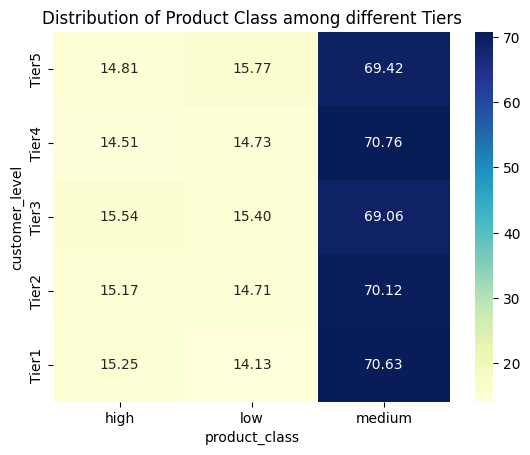

In [ ]:
sns.heatmap(product_class_percentage, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Distribution of Product Class among different Tiers')

In [ ]:
product_size_counts = df.pivot_table(index='customer_level', columns='product_size', aggfunc='size', fill_value=0)
total_product_size_counts = product_size_counts.sum(axis=1)
product_size_percentage = product_size_counts.div(total_product_size_counts, axis=0) * 100
product_size_percentage = product_size_percentage.round(2)
product_size_percentage

product_size,large,medium,small
customer_level,,,
Tier5,17.87,68.58,13.55
Tier4,19.22,67.14,13.64
Tier3,20.06,66.29,13.65
Tier2,20.21,65.83,13.97
Tier1,21.01,63.42,15.57


Text(0.5, 1.0, 'Distribution of Product Size among different Tiers')

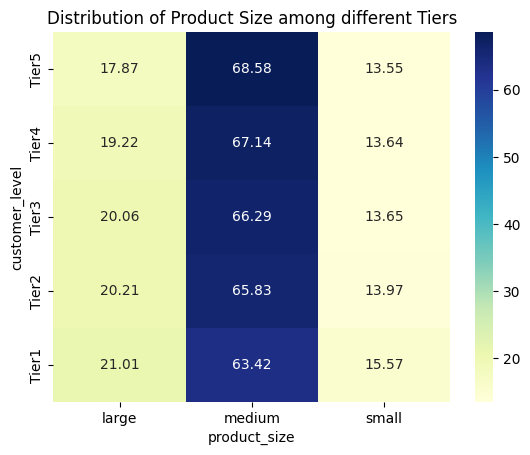

In [ ]:
sns.heatmap(product_size_percentage, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Distribution of Product Size among different Tiers')

### Customer Demograpihc by Segmentation

1. By gender and age

In [ ]:
print(df.head().to_string())

  transaction_id product_id customer_id transaction_date  online_order order_status           brand product_line product_class product_size  list_price  standard_cost  product_first_sold_date              name  gender  past_3_years_bike_related_purchases   age                   job_title job_industry_category     wealth_segment deceased_indicator owns_car  tenure              address postcode state    country  property_valuation   profit  recency  frequency  monetary  recency_score  frequency_score  monetary_score  rfm_score customer_level
0              1          2        2950       2017-02-25         False     Approved           Solex     Standard        medium       medium       71.49          53.62                  41245.0   Kristos Anthony    Male                                 19.0  65.0         Software Engineer I    Financial Services      Mass Customer                  N      Yes    10.0    984 Hoepker Court     3064   VIC  Australia                 6.0    17.87       76    

Text(0.5, 1.0, 'Gender Distribution by Customer Level')

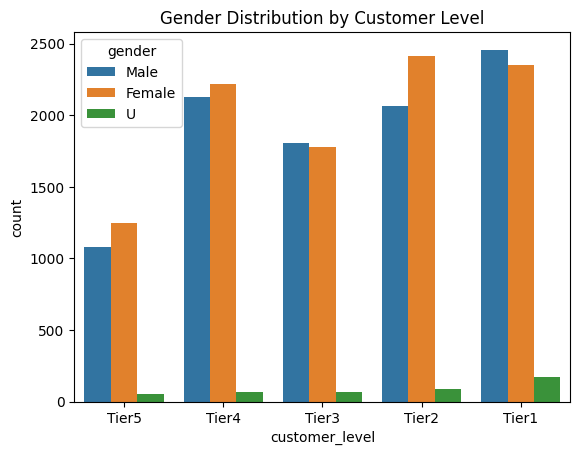

In [ ]:
sns.countplot(x='customer_level', data=df, hue='gender')
plt.title('Gender Distribution by Customer Level')

In [ ]:
age_distribution = df.groupby('customer_level')['age'].describe().round(2)

age_distribution

,count,mean,std,min,25%,50%,75%,max
customer_level,,,,,,,,
Tier5,2384.0,41.79,12.50,18.0,32.0,42.0,50.0,84.0
Tier4,4412.0,42.41,12.63,18.0,33.0,43.0,52.0,76.0
Tier3,3649.0,42.61,12.13,18.0,33.0,42.0,52.0,66.0
Tier2,4568.0,42.91,12.46,18.0,34.0,42.0,52.0,76.0
Tier1,4984.0,41.59,12.51,18.0,32.0,42.0,50.0,88.0


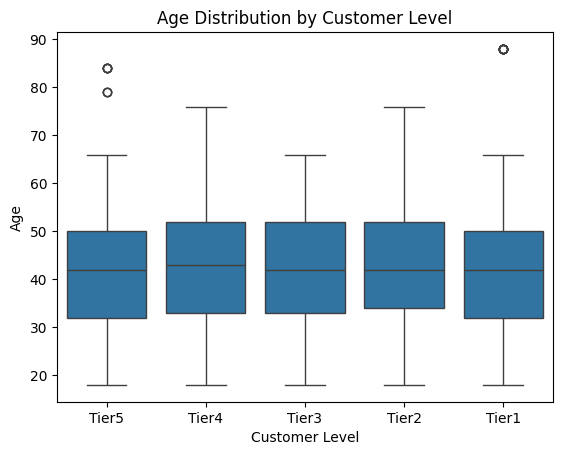

In [ ]:
sns.boxplot(x='customer_level', y='age', data=df)
plt.title('Age Distribution by Customer Level')
plt.xlabel('Customer Level')
plt.ylabel('Age')

plt.show()

The age distribution for each customer level are quite similar.

2. By Wealth or other factors

Text(0.5, 1.0, 'Vehicle Ownership by Customer Level')

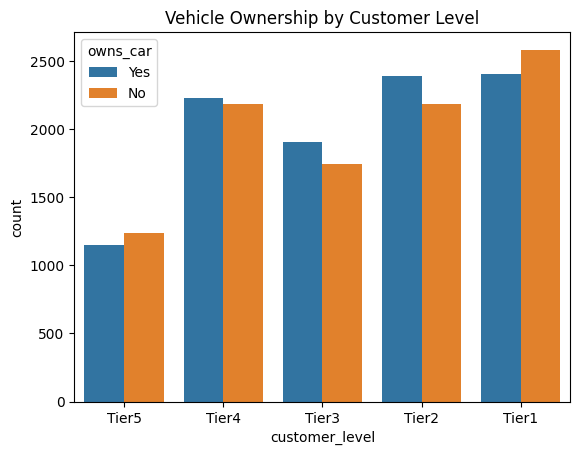

In [ ]:
sns.countplot(x='customer_level', data=df, hue='owns_car')
plt.title('Vehicle Ownership by Customer Level')

Text(0.5, 1.0, 'Wealth Distribution by Customer Level')

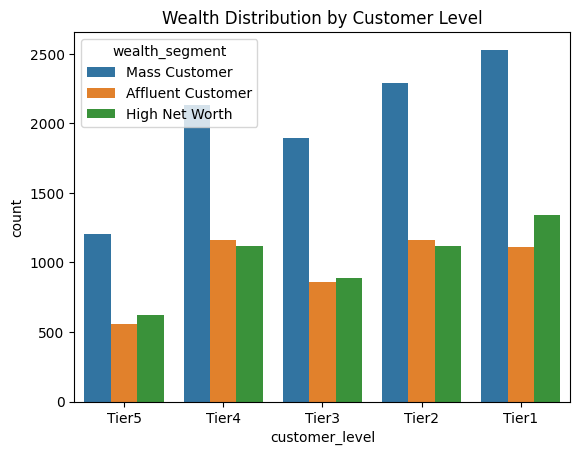

In [ ]:
sns.countplot(x='customer_level', data=df, hue='wealth_segment')
plt.title('Wealth Distribution by Customer Level')

In [ ]:
print(df.head().to_string())

  transaction_id product_id customer_id transaction_date  online_order order_status           brand product_line product_class product_size  list_price  standard_cost  product_first_sold_date              name  gender  past_3_years_bike_related_purchases   age                   job_title job_industry_category     wealth_segment deceased_indicator owns_car  tenure              address postcode state    country  property_valuation   profit  recency  frequency  monetary  recency_score  frequency_score  monetary_score  rfm_score customer_level
0              1          2        2950       2017-02-25         False     Approved           Solex     Standard        medium       medium       71.49          53.62                  41245.0   Kristos Anthony    Male                                 19.0  65.0         Software Engineer I    Financial Services      Mass Customer                  N      Yes    10.0    984 Hoepker Court     3064   VIC  Australia                 6.0    17.87       76    

Text(0.5, 1.0, 'State Distribution by Customer Level')

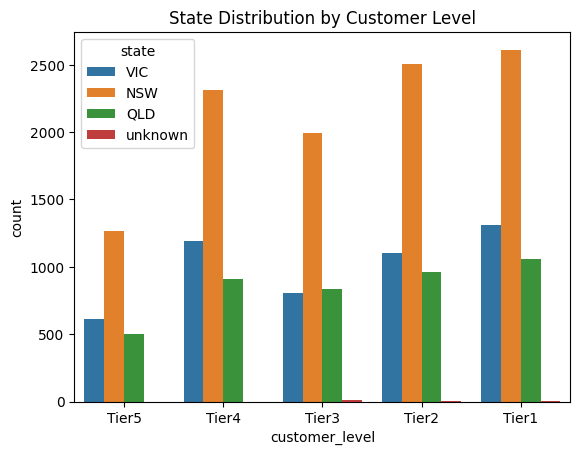

In [ ]:
sns.countplot(x='customer_level', data=df, hue='state')
plt.title('State Distribution by Customer Level')

# Cohort Analysis

In [ ]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,property_valuation,profit,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,customer_level
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,6.0,17.87,76,3,1953.15,2.0,1.0,1.0,4,Tier5
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,5.0,1702.55,21,7,7351.70,4.0,4.0,4.0,12,Tier2
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,1.0,1544.61,57,6,8148.22,3.0,3.0,4.0,10,Tier3
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,10.0,817.36,122,7,7539.81,1.0,4.0,4.0,9,Tier3
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,7.0,1055.82,76,10,11292.54,2.0,5.0,5.0,12,Tier2


In [ ]:
def get_month(x):
  return dt.datetime(x.year, x.month, 1)

df['transaction_month'] = df['transaction_date'].apply(get_month)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,profit,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,customer_level,transaction_month
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,17.87,76,3,1953.15,2.0,1.0,1.0,4,Tier5,2017-02-01
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,1702.55,21,7,7351.70,4.0,4.0,4.0,12,Tier2,2017-05-01
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,1544.61,57,6,8148.22,3.0,3.0,4.0,10,Tier3,2017-10-01
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,817.36,122,7,7539.81,1.0,4.0,4.0,9,Tier3,2017-08-01
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,1055.82,76,10,11292.54,2.0,5.0,5.0,12,Tier2,2017-10-01


In [ ]:
df.groupby('customer_id')['transaction_month'].min().head()

,transaction_month
customer_id,
1,2017-01-01
2,2017-05-01
3,2017-02-01
4,2017-04-01
5,2017-03-01


In [ ]:
df.groupby('customer_id')['transaction_month'].transform('min').head()

,transaction_month
0,2017-02-01
1,2017-01-01
2,2017-01-01
3,2017-02-01
4,2017-01-01


In [ ]:
df['CohortMonth'] = df.groupby('customer_id')['transaction_month'].transform('min')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,customer_level,transaction_month,CohortMonth
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,76,3,1953.15,2.0,1.0,1.0,4,Tier5,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,21,7,7351.70,4.0,4.0,4.0,12,Tier2,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,57,6,8148.22,3.0,3.0,4.0,10,Tier3,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,122,7,7539.81,1.0,4.0,4.0,9,Tier3,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,76,10,11292.54,2.0,5.0,5.0,12,Tier2,2017-10-01,2017-01-01


In [ ]:
def get_date_int(df, column):
  year = df[column].dt.year
  month = df[column].dt.month
  day = df[column].dt.day
  return year, month, day

df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')
transaction_year, transaction_month, _ = get_date_int(df, 'transaction_date')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

In [ ]:
years_diff = transaction_year - cohort_year
months_diff = transaction_month - cohort_month

df['CohortIndex'] = years_diff * 12 + months_diff + 1
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,customer_level,transaction_month,CohortMonth,CohortIndex
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,3,1953.15,2.0,1.0,1.0,4,Tier5,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,7,7351.70,4.0,4.0,4.0,12,Tier2,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,6,8148.22,3.0,3.0,4.0,10,Tier3,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,7,7539.81,1.0,4.0,4.0,9,Tier3,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,10,11292.54,2.0,5.0,5.0,12,Tier2,2017-10-01,2017-01-01,10


In [ ]:
cohort_data = df.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1353
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


In [ ]:
cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='customer_id')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1353.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,530.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='customer_id')
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size, axis=0).round(3) * 100
retention.index = retention.index.strftime('%Y-%m')
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,37.0,39.2,36.7,38.1
2017-02,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


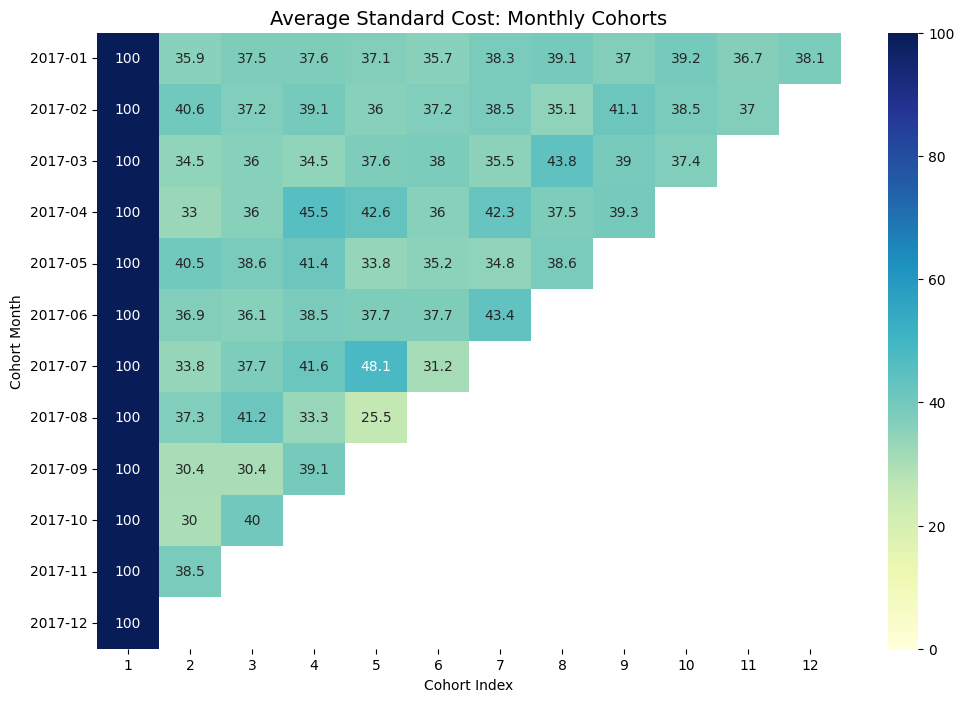

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Average Standard Cost: Monthly Cohorts', fontsize=14)
sns.heatmap(retention, annot=True, vmin=0.0, vmax=100, cmap='YlGnBu', fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.show()

In [ ]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,37.0,39.2,36.7,38.1
2017-02,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


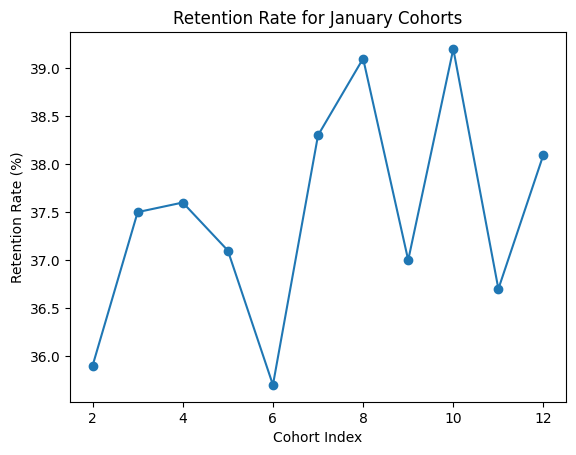

In [ ]:
jan_retention = retention.iloc[0,1:]

plt.plot(jan_retention.index, jan_retention.values, marker='o')

plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate for January Cohorts')

plt.show()

Focusing on comparison of two groups:
1. lower retention group(cohort index is 2 and 6)
2. higher retention group(cohort index is 7, 8, 10, 12)


In [ ]:
jan_customer = df[df['CohortMonth'] == '2017-01-01']
jan_low_retention = jan_customer[jan_customer['CohortIndex'].isin([2, 6])]
jan_high_retention = jan_customer[jan_customer['CohortIndex'].isin([7, 8, 10, 12])]

In [ ]:
brand_customer_low_01 = jan_low_retention.groupby('brand')['customer_id'].nunique()
ttl_customer_low = jan_low_retention['customer_id'].nunique()
brand_retention_low_percentage = (brand_customer_low_01 / ttl_customer_low).round(3) * 100

brand_customer_high_01 = jan_high_retention.groupby('brand')['customer_id'].nunique()
ttl_customer_high = jan_high_retention['customer_id'].nunique()
brand_retention_high_percentage = (brand_customer_high_01 / ttl_customer_high).round(3) * 100

low_retention_df = brand_retention_low_percentage.reset_index(name='Low Retention Percentage')
high_retention_df = brand_retention_high_percentage.reset_index(name='High Retention Percentage')

retention_brand_df = pd.merge(low_retention_df, high_retention_df, on='brand', how='outer')
retention_brand_df['gap'] = retention_brand_df['High Retention Percentage'] - retention_brand_df['Low Retention Percentage']
retention_brand_df

,brand,Low Retention Percentage,High Retention Percentage,gap
0,Giant Bicycles,25.3,33.1,7.8
1,Norco Bicycles,19.5,29.8,10.3
2,OHM Cycles,19.8,29.0,9.2
3,Solex,29.4,39.1,9.7
4,Trek Bicycles,22.8,28.6,5.8
5,WeareA2B,22.9,31.9,9.0


Customers with higher retention rates seem to prefer Norco Bicycles and Solex more than those with lower retention rates. Therefore, it may be beneficial to focus more on promoting these higher retention brands.

In [ ]:
brand_retention = jan_customer.groupby(['brand','CohortIndex'])['customer_id'].nunique().unstack()
brand_size = brand_retention.iloc[:,0]
brand_retention = brand_retention.divide(brand_size, axis=0).round(3) * 100
brand_retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
brand,,,,,,,,,,,,
Giant Bicycles,100.0,40.3,32.2,35.2,36.3,37.7,37.0,43.2,35.5,35.2,37.4,41.4
Norco Bicycles,100.0,36.3,41.5,44.0,36.8,33.8,40.6,38.5,35.9,39.7,32.1,43.6
OHM Cycles,100.0,28.5,33.6,31.2,31.6,35.9,41.0,37.9,32.0,39.1,35.9,34.4
Solex,100.0,36.0,40.3,40.3,37.4,34.0,38.3,39.4,39.7,39.7,40.9,34.0
Trek Bicycles,100.0,44.3,38.9,40.7,52.9,41.6,47.1,41.2,42.5,45.7,33.5,33.0
WeareA2B,100.0,34.6,38.7,38.7,40.1,34.9,34.2,38.3,38.3,41.3,39.4,40.1


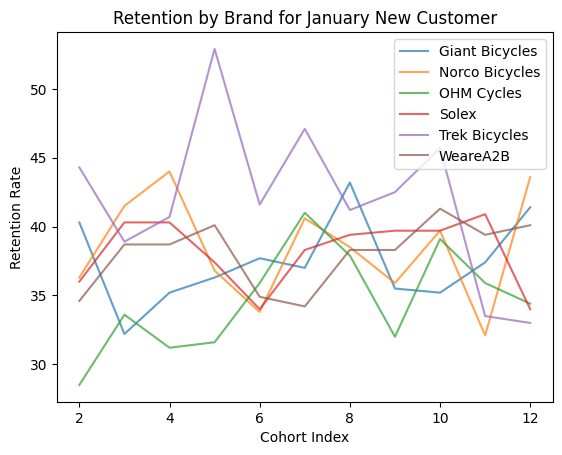

In [ ]:
# Draw the brand retention line plot
brand_retention = brand_retention.iloc[:,1:]
for brand in brand_retention.index:
    plt.plot(brand_retention.columns, brand_retention.loc[brand], label=brand, alpha=0.7)
plt.title('Retention by Brand for January New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate')
plt.legend(loc='best')


Trek Bicycles has a more loyal customer base in this cohort, indicated by higher retention rates.

In contrast, OHM Cycles and Norco Bicycles show the lowest retention rates, suggesting weaker customer loyalty.

WeareA2B displays a more stable retention rate.

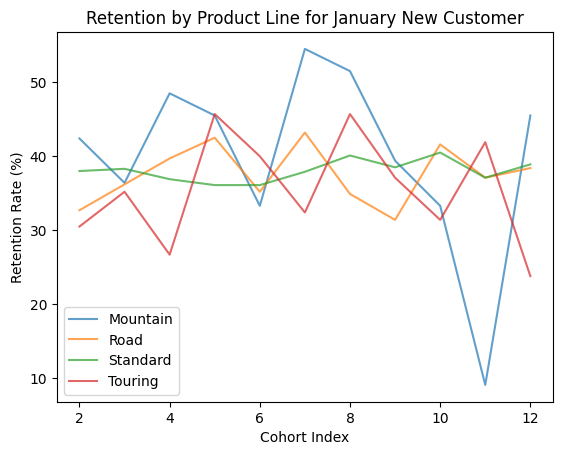

In [ ]:
# Product line
product_retention = jan_customer.groupby(['product_line', 'CohortIndex'])['customer_id'].nunique().unstack()
product_size = product_retention.iloc[:, 0]
product_retention = product_retention.divide(product_size, axis=0).round(3) * 100


product_retention = product_retention.iloc[:, 1:]
for product in product_retention.index:
    plt.plot(product_retention.columns, product_retention.loc[product], label=product, alpha=0.7)

plt.title('Retention by Product Line for January New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')


The Mountain product line shows a significant drop in retention from cohort index 8 to 11, possibly indicating a seasonal change.

The Standard product line displays more stability compared to the others.

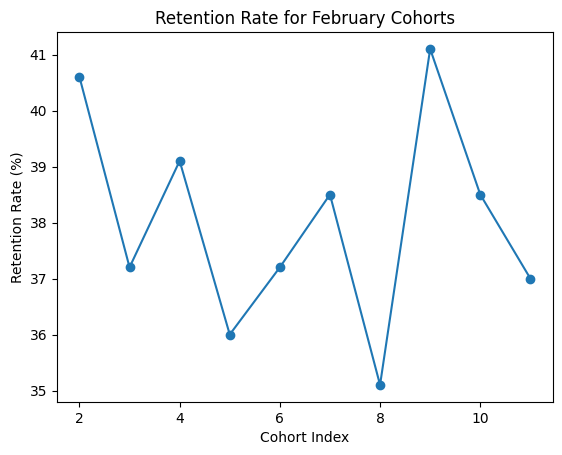

In [ ]:
feb_retention = retention.iloc[1,1:]

plt.plot(feb_retention.index, feb_retention.values, marker='o')

plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate for February Cohorts')

plt.show()

The reason of the fluctuation from 40 to 35

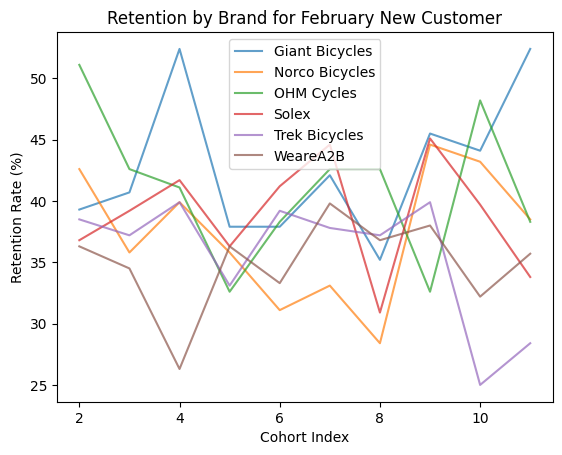

In [ ]:
feb_customer = df[df['CohortMonth'] == '2017-02-01']
brand_retention_feb = feb_customer.groupby(['brand', 'CohortIndex'])['customer_id'].nunique().unstack()
brand_size_feb = brand_retention_feb.iloc[:, 0]
brand_retention_feb = brand_retention_feb.divide(brand_size_feb, axis=0).round(3) * 100

brand_retention_feb = brand_retention_feb.iloc[:, 1:]
for brand in brand_retention_feb.index:
    plt.plot(brand_retention_feb.columns, brand_retention_feb.loc[brand], label=brand, alpha=0.7)

plt.title('Retention by Brand for February New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()


All brands exhibit significant fluctuations, with Giant Bicycles maintaining a higher retention rate overall.

Notably, there is a noticeable drop in retention across almost all brands at cohort index 8.

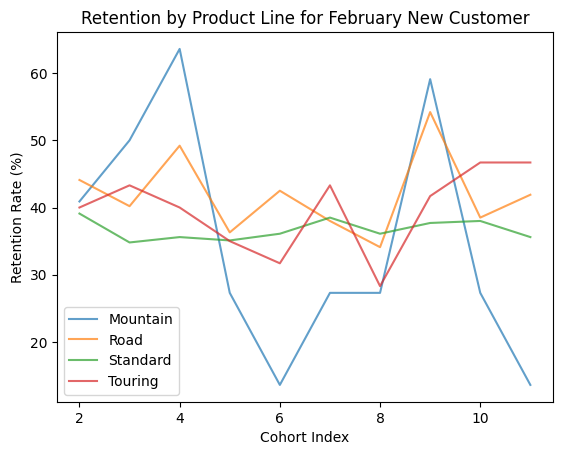

In [ ]:
productline_retention_feb = feb_customer.groupby(['product_line', 'CohortIndex'])['customer_id'].nunique().unstack()
productline_size_feb = productline_retention_feb.iloc[:, 0]
productline_retention_feb = productline_retention_feb.divide(productline_size_feb, axis=0).round(3) * 100

productline_retention_feb = productline_retention_feb.iloc[:, 1:]
for product_line in productline_retention_feb.index:
    plt.plot(productline_retention_feb.columns, productline_retention_feb.loc[product_line], label=product_line, alpha=0.7)

plt.title('Retention by Product Line for February New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')

Unlike the previous month, the Mountain product line shows significant fluctuations, while the Standard line remains more stable.

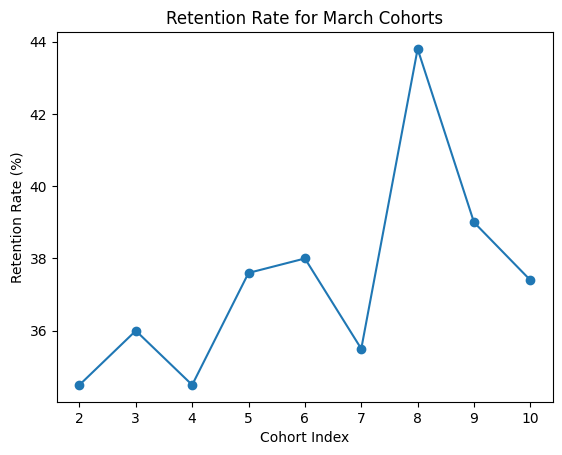

In [ ]:
mar_retention = retention.iloc[2,1:]

plt.plot(mar_retention.index, mar_retention.values, marker='o')

plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate for March Cohorts')

plt.show()

Increase is a good sign, but why stop?

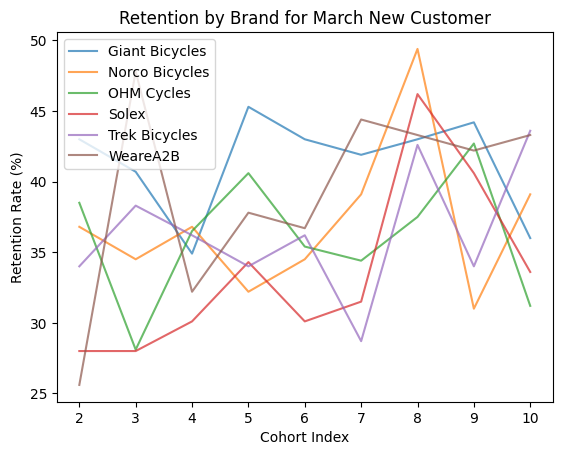

In [ ]:
mar_customer = df[df['CohortMonth'] == '2017-03-01']

brand_retention_mar = mar_customer.groupby(['brand', 'CohortIndex'])['customer_id'].nunique().unstack()
brand_size_mar = brand_retention_mar.iloc[:, 0]
brand_retention_mar = brand_retention_mar.divide(brand_size_mar, axis=0).round(3) * 100
brand_retention_mar = brand_retention_mar.iloc[:, 1:]

for brand in brand_retention_mar.index:
    plt.plot(brand_retention_mar.columns, brand_retention_mar.loc[brand], label=brand, alpha=0.7)
plt.title('Retention by Brand for March New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

WeareA2B shows a strong peak in retention at cohort index 3, while many other brands have notable retention peaks around cohort index 8.

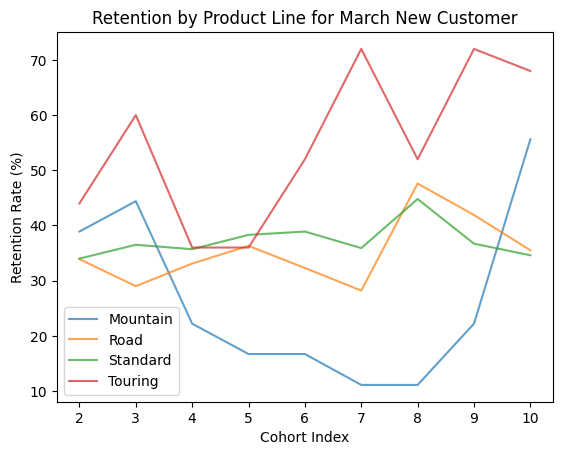

In [ ]:
productline_retention_mar = mar_customer.groupby(['product_line', 'CohortIndex'])['customer_id'].nunique().unstack()
productline_size_mar = productline_retention_mar.iloc[:, 0]
productline_retention_mar = productline_retention_mar.divide(productline_size_mar, axis=0).round(3) * 100
productline_retention_mar = productline_retention_mar.iloc[:, 1:]

for product_line in productline_retention_mar.index:
    plt.plot(productline_retention_mar.columns, productline_retention_mar.loc[product_line], label=product_line, alpha=0.7)
plt.title('Retention by Product Line for March New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

Touring shows potential for this group of customers, while the Mountain product line unexpectedly performs poorly.

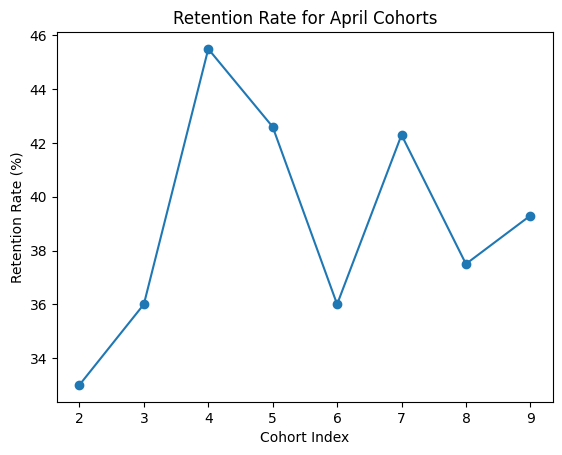

In [ ]:
apr_retention = retention.iloc[3,1:]

plt.plot(apr_retention.index, apr_retention.values, marker='o')

plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate for April Cohorts')

plt.show()

The reason why from top then decline

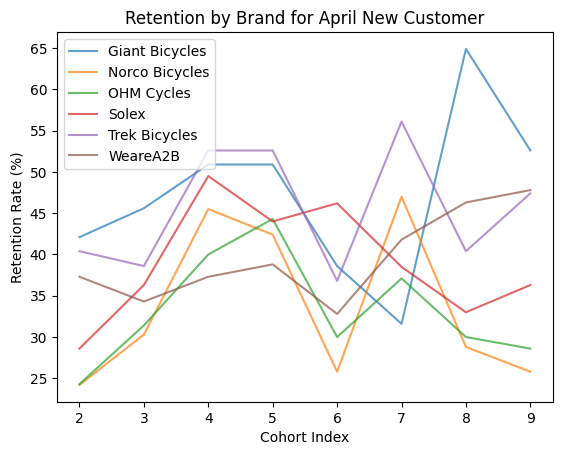

In [ ]:
apr_customer = df[df['CohortMonth'] == '2017-04-01']

brand_retention_apr = apr_customer.groupby(['brand', 'CohortIndex'])['customer_id'].nunique().unstack()
brand_size_apr = brand_retention_apr.iloc[:, 0]
brand_retention_apr = brand_retention_apr.divide(brand_size_apr, axis=0).round(3) * 100
brand_retention_apr = brand_retention_apr.iloc[:, 1:]

for brand in brand_retention_apr.index:
    plt.plot(brand_retention_apr.columns, brand_retention_apr.loc[brand], label=brand, alpha=0.7)
plt.title('Retention by Brand for April New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

Trek Bicycles and Giant Bicycles show higher retention rates, with noticeable peaks around cohort indexes 3 and 9.

In contrast, Norco Bicycles experiences a significant drop after cohort index 5.

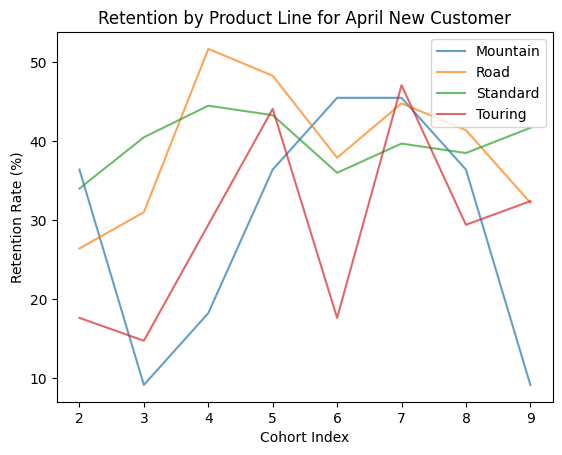

In [ ]:
productline_retention_apr = apr_customer.groupby(['product_line', 'CohortIndex'])['customer_id'].nunique().unstack()
productline_size_apr = productline_retention_apr.iloc[:, 0]
productline_retention_apr = productline_retention_apr.divide(productline_size_apr, axis=0).round(3) * 100
productline_retention_apr = productline_retention_apr.iloc[:, 1:]

for product_line in productline_retention_apr.index:
    plt.plot(productline_retention_apr.columns, productline_retention_apr.loc[product_line], label=product_line, alpha=0.7)
plt.title('Retention by Product Line for April New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

The Standard product line continues to demonstrate stability, while the Mountain line shows the most significant fluctuations in retention rates.

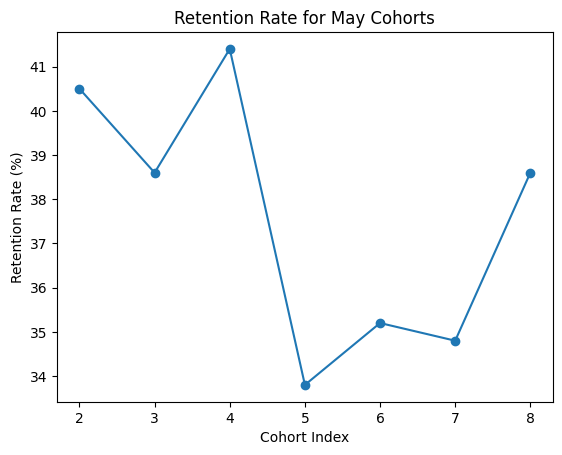

In [ ]:
may_retention = retention.iloc[4,1:]

plt.plot(may_retention.index, may_retention.values, marker='o')

plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate for May Cohorts')

plt.show()

why drop?

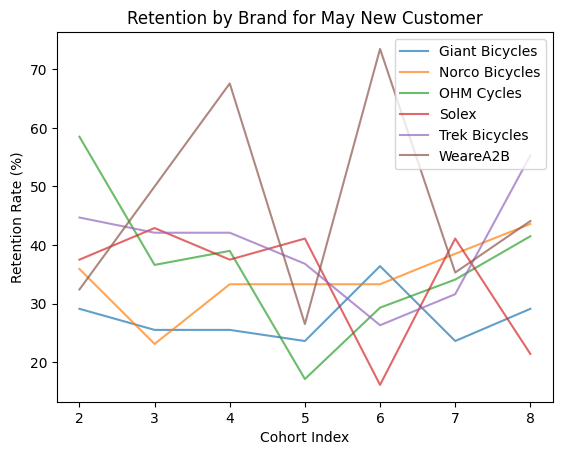

In [ ]:
may_customer = df[df['CohortMonth'] == '2017-05-01']

brand_retention_may = may_customer.groupby(['brand', 'CohortIndex'])['customer_id'].nunique().unstack()
brand_size_may = brand_retention_may.iloc[:, 0]
brand_retention_may = brand_retention_may.divide(brand_size_may, axis=0).round(3) * 100
brand_retention_may = brand_retention_may.iloc[:, 1:]

for brand in brand_retention_may.index:
    plt.plot(brand_retention_may.columns, brand_retention_may.loc[brand], label=brand, alpha=0.7)
plt.title('Retention by Brand for May New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

Unexpectedly, WeareA2B shows several standout performances in retention, while most other brands exhibit similar fluctuations.

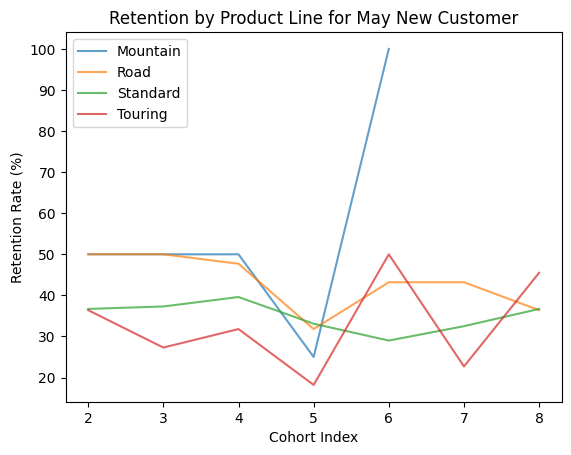

In [ ]:
productline_retention_may = may_customer.groupby(['product_line', 'CohortIndex'])['customer_id'].nunique().unstack()
productline_size_may = productline_retention_may.iloc[:, 0]
productline_retention_may = productline_retention_may.divide(productline_size_may, axis=0).round(3) * 100
productline_retention_may = productline_retention_may.iloc[:, 1:]


for product_line in productline_retention_may.index:
    plt.plot(productline_retention_may.columns, productline_retention_may.loc[product_line], label=product_line, alpha=0.7)
plt.title('Retention by Product Line for May New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

The Mountain product line demonstrates significant instability, with retention rates showing considerable fluctuations across cohorts.

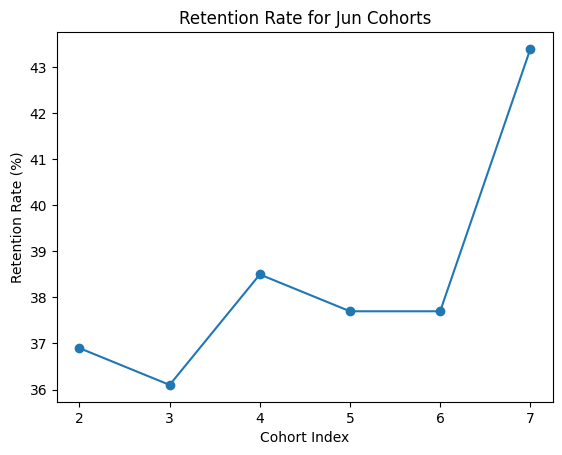

In [ ]:
jun_retention = retention.iloc[5,1:]

plt.plot(jun_retention.index, jun_retention.values, marker='o')

plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate for Jun Cohorts')

plt.show()

Why peak?

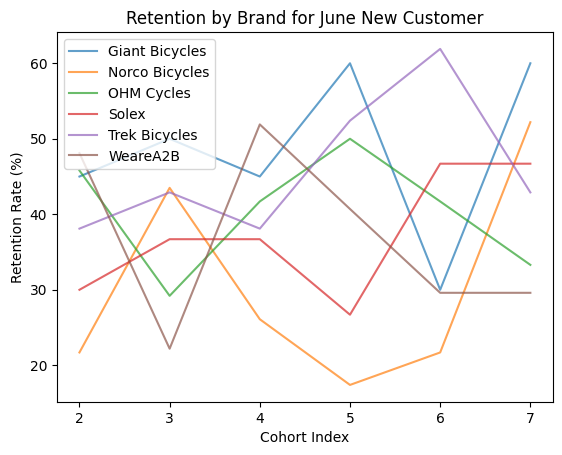

In [ ]:
jun_customer = df[df['CohortMonth'] == '2017-06-01']

brand_retention_jun = jun_customer.groupby(['brand', 'CohortIndex'])['customer_id'].nunique().unstack()
brand_size_jun = brand_retention_jun.iloc[:, 0]
brand_retention_jun = brand_retention_jun.divide(brand_size_jun, axis=0).round(3) * 100
brand_retention_jun = brand_retention_jun.iloc[:, 1:]

for brand in brand_retention_jun.index:
    plt.plot(brand_retention_jun.columns, brand_retention_jun.loc[brand], label=brand, alpha=0.7)
plt.title('Retention by Brand for June New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

Norco Bicycles shows significant instability, while Trek Bicycles are quite popular among customers.

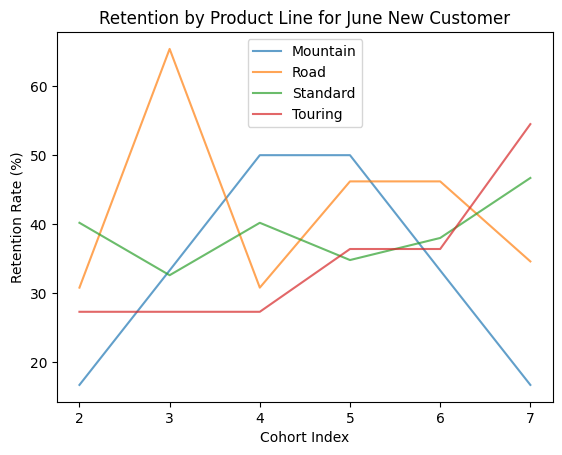

In [ ]:
productline_retention_jun = jun_customer.groupby(['product_line', 'CohortIndex'])['customer_id'].nunique().unstack()
productline_size_jun = productline_retention_jun.iloc[:, 0]
productline_retention_jun = productline_retention_jun.divide(productline_size_jun, axis=0).round(3) * 100
productline_retention_jun = productline_retention_jun.iloc[:, 1:]

for product_line in productline_retention_jun.index:
    plt.plot(productline_retention_jun.columns, productline_retention_jun.loc[product_line], label=product_line, alpha=0.7)
plt.title('Retention by Product Line for June New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

Road shows promising momentum and potential, while Mountain appears to be highly uncertain.

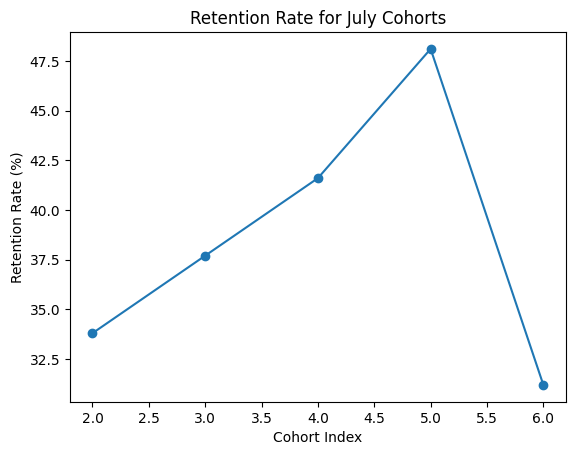

In [ ]:
jul_retention = retention.iloc[6,1:]

plt.plot(jul_retention.index, jul_retention.values, marker='o')

plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate for July Cohorts')

plt.show()

Why drop?

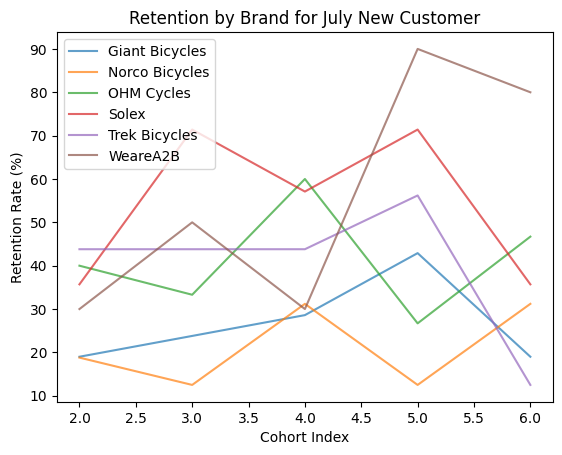

In [ ]:
jul_customer = df[df['CohortMonth'] == '2017-07-01']

brand_retention_jul = jul_customer.groupby(['brand', 'CohortIndex'])['customer_id'].nunique().unstack()
brand_size_jul = brand_retention_jul.iloc[:, 0]
brand_retention_jul = brand_retention_jul.divide(brand_size_jul, axis=0).round(3) * 100
brand_retention_jul = brand_retention_jul.iloc[:, 1:]

for brand in brand_retention_jul.index:
    plt.plot(brand_retention_jul.columns, brand_retention_jul.loc[brand], label=brand, alpha=0.7)
plt.title('Retention by Brand for July New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

Norco Bicycles is the least popular brand, while WeareA2B is the most popular, encouraging many customers to return.

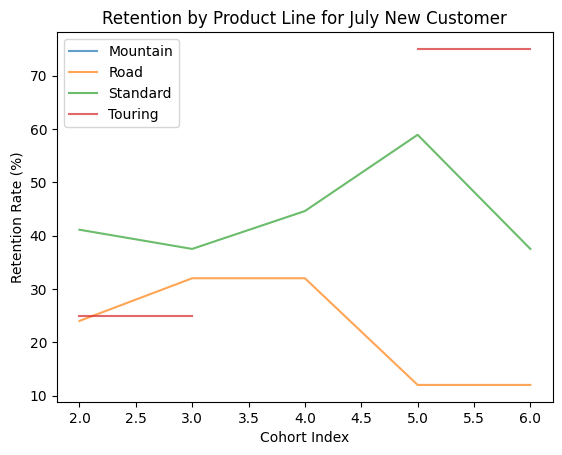

In [ ]:
productline_retention_jul = jul_customer.groupby(['product_line', 'CohortIndex'])['customer_id'].nunique().unstack()
productline_size_jul = productline_retention_jul.iloc[:, 0]
productline_retention_jul = productline_retention_jul.divide(productline_size_jul, axis=0).round(3) * 100
productline_retention_jul = productline_retention_jul.iloc[:, 1:]

for product_line in productline_retention_jul.index:
    plt.plot(productline_retention_jul.columns, productline_retention_jul.loc[product_line], label=product_line, alpha=0.7)
plt.title('Retention by Product Line for July New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

The absence of the Mountain product line indicates its instability in retaining customers.

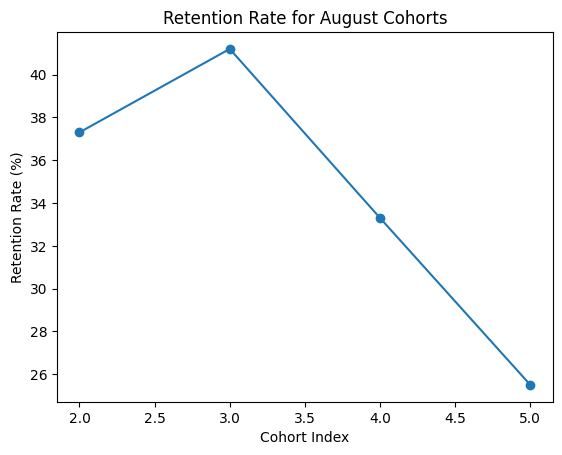

In [ ]:
aug_retention = retention.iloc[7,1:]

plt.plot(aug_retention.index, aug_retention.values, marker='o')

plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate for August Cohorts')

plt.show()

why decline?

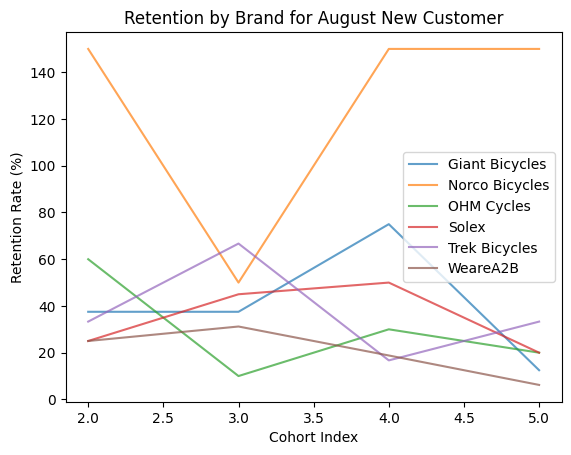

In [ ]:
aug_customer = df[df['CohortMonth'] == '2017-08-01']

brand_retention_aug = aug_customer.groupby(['brand', 'CohortIndex'])['customer_id'].nunique().unstack()
brand_size_aug = brand_retention_aug.iloc[:, 0]
brand_retention_aug = brand_retention_aug.divide(brand_size_aug, axis=0).round(3) * 100
brand_retention_aug = brand_retention_aug.iloc[:, 1:]

for brand in brand_retention_aug.index:
    plt.plot(brand_retention_aug.columns, brand_retention_aug.loc[brand], label=brand, alpha=0.7)
plt.title('Retention by Brand for August New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

Norco Bicycles is surprisingly popular, while OHM Cycles and WeareA2B show average performance.

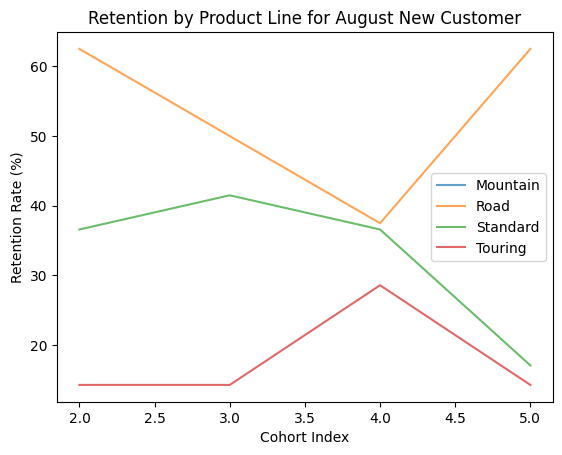

In [ ]:
productline_retention_aug = aug_customer.groupby(['product_line', 'CohortIndex'])['customer_id'].nunique().unstack()
productline_size_aug = productline_retention_aug.iloc[:, 0]
productline_retention_aug = productline_retention_aug.divide(productline_size_aug, axis=0).round(3) * 100
productline_retention_aug = productline_retention_aug.iloc[:, 1:]

for product_line in productline_retention_aug.index:
    plt.plot(productline_retention_aug.columns, productline_retention_aug.loc[product_line], label=product_line, alpha=0.7)
plt.title('Retention by Product Line for August New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

All product lines except "Road" are on a declining trend.

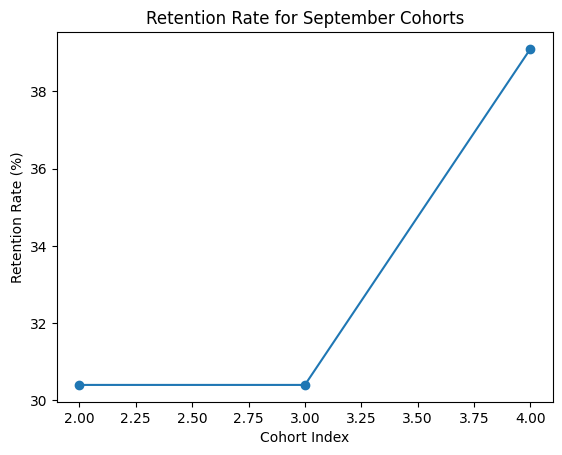

In [ ]:
sep_retention = retention.iloc[8,1:]

plt.plot(sep_retention.index, sep_retention.values, marker='o')

plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate for September Cohorts')

plt.show()

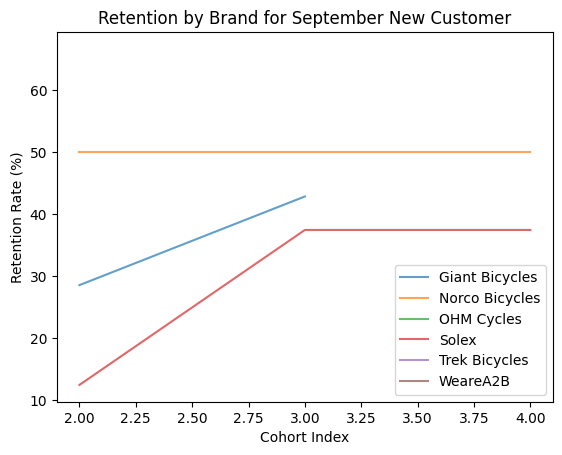

In [ ]:
sep_customer = df[df['CohortMonth'] == '2017-09-01']

brand_retention_sep = sep_customer.groupby(['brand', 'CohortIndex'])['customer_id'].nunique().unstack()
brand_size_sep = brand_retention_sep.iloc[:, 0]
brand_retention_sep = brand_retention_sep.divide(brand_size_sep, axis=0).round(3) * 100
brand_retention_sep = brand_retention_sep.iloc[:, 1:]

for brand in brand_retention_sep.index:
    plt.plot(brand_retention_sep.columns, brand_retention_sep.loc[brand], label=brand, alpha=0.7)
plt.title('Retention by Brand for September New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

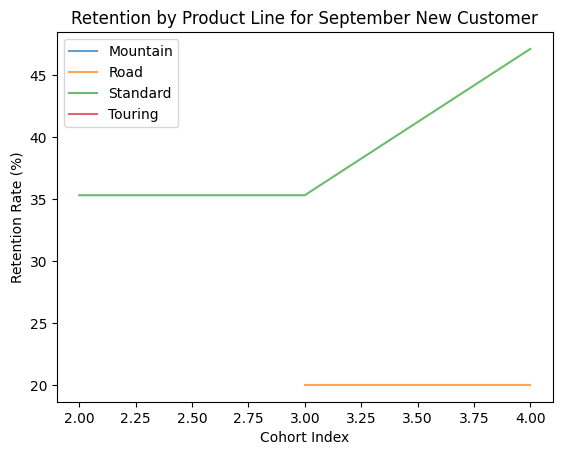

In [ ]:
productline_retention_sep = sep_customer.groupby(['product_line', 'CohortIndex'])['customer_id'].nunique().unstack()
productline_size_sep = productline_retention_sep.iloc[:, 0]
productline_retention_sep = productline_retention_sep.divide(productline_size_sep, axis=0).round(3) * 100
productline_retention_sep = productline_retention_sep.iloc[:, 1:]

for product_line in productline_retention_sep.index:
    plt.plot(productline_retention_sep.columns, productline_retention_sep.loc[product_line], label=product_line, alpha=0.7)
plt.title('Retention by Product Line for September New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

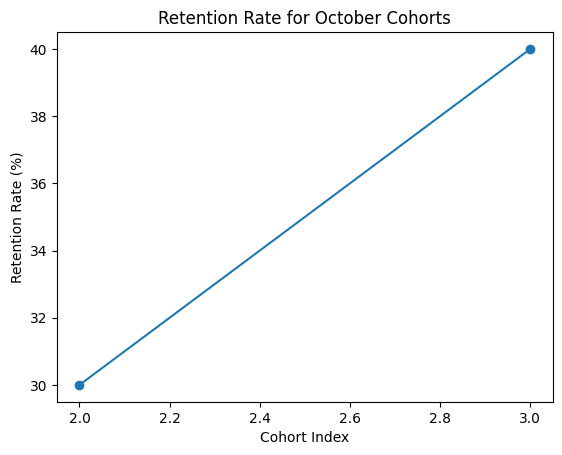

In [ ]:
oct_retention = retention.iloc[9,1:]

plt.plot(oct_retention.index, oct_retention.values, marker='o')

plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate for October Cohorts')

plt.show()

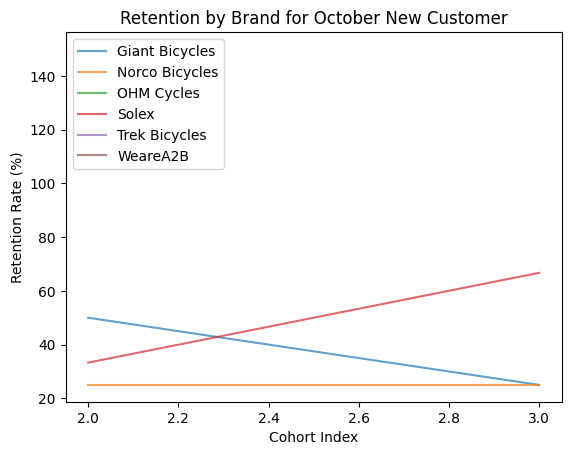

In [ ]:
oct_customer = df[df['CohortMonth'] == '2017-10-01']

brand_retention_oct = oct_customer.groupby(['brand', 'CohortIndex'])['customer_id'].nunique().unstack()
brand_size_oct = brand_retention_oct.iloc[:, 0]
brand_retention_oct = brand_retention_oct.divide(brand_size_oct, axis=0).round(3) * 100
brand_retention_oct = brand_retention_oct.iloc[:, 1:]

for brand in brand_retention_oct.index:
    plt.plot(brand_retention_oct.columns, brand_retention_oct.loc[brand], label=brand, alpha=0.7)
plt.title('Retention by Brand for October New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

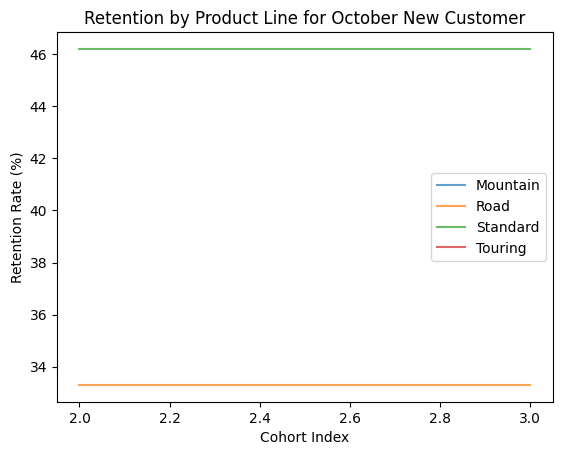

In [ ]:
productline_retention_oct = oct_customer.groupby(['product_line', 'CohortIndex'])['customer_id'].nunique().unstack()
productline_size_oct = productline_retention_oct.iloc[:, 0]
productline_retention_oct = productline_retention_oct.divide(productline_size_oct, axis=0).round(3) * 100
productline_retention_oct = productline_retention_oct.iloc[:, 1:]

for product_line in productline_retention_oct.index:
    plt.plot(productline_retention_oct.columns, productline_retention_oct.loc[product_line], label=product_line, alpha=0.7)
plt.title('Retention by Product Line for October New Customer')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='best')
plt.show()

From the perspective of brands, Giant Bicycle and Trek Bicycles have performed relatively well. However, customer preferences vary each month, and they may also choose brands like Norco Bicycles and WeareA2B.

Regarding product lines, the Standard line is the most stable and conservative choice. The Mountain line may experience fluctuations with the seasons, while the Tour line occasionally shows promising potential.

In [ ]:
file_path = '/content/bicycle.xlsx'

# 将 DataFrame 保存为 Excel 文件
df.to_excel(file_path, index=False)